### Imports

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import streamlit as st
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


### Dataset Rundown

In [45]:
df = pd.read_csv('./data/FinancialMarketData.xlsx - EWS.csv')

# Set display options for a single-line view
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Set width to unlimited
pd.set_option('display.max_rows', None)        # Show only one row
pd.set_option('display.expand_frame_repr', False)  # Don't wrap to multiple lines

# Display the first row of data
print(df.head(10))

#checking nan or any other values for data cleaning
print(df.isnull().sum())



   Y       Data  XAU BGNL  ECSURPUS     BDIY     CRY     DXY     JPY   GBP    Cl1    VIX  USGG30YR  GT10  USGG2YR  USGG3M  US0001M  GTDEM30Y  GTDEM10Y  GTDEM2Y  EONIA  GTITL30YR  GTITL10YR  GTITL2YR  GTJPY30YR  GTJPY10YR  GTJPY2YR  GTGBP30Y  GTGBP20Y  GTGBP2Y  LUMSTRUU  LMBITR  LUACTRUU  LF98TRUU  LG30TRUU  LP01TREU  EMUSTRUU  LF94TRUU     MXUS    MXEU     MXJP    MXBR    MXRU    MXIN   MXCN
0  0  1/11/2000   283.250     0.077 1388.000 157.260 100.560 105.860 1.646 25.770 22.500     6.671 6.657    6.428   5.426    5.781     6.121     5.541    4.316  2.890      6.321      5.777     4.495      2.422      1.709     0.346     4.535     4.770    6.524   870.940 474.045   990.750   546.040   305.057   116.464   230.527   123.762 1416.120 127.750  990.590 856.760 224.330 217.340 34.300
1  0  1/18/2000   287.650     0.043 1405.000 165.010 101.860 105.470 1.638 28.850 21.500     6.747 6.748    6.465   5.378    5.803     6.254     5.644    4.321  3.030      6.459      5.889     4.535      2.418 

### Plot settings

In [46]:
#plot theme darkgrid
sns.set_theme(style="darkgrid", palette="dark")
plt.style.use("dark_background")

### Data Preprocessing

c:\Users\sriuj\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


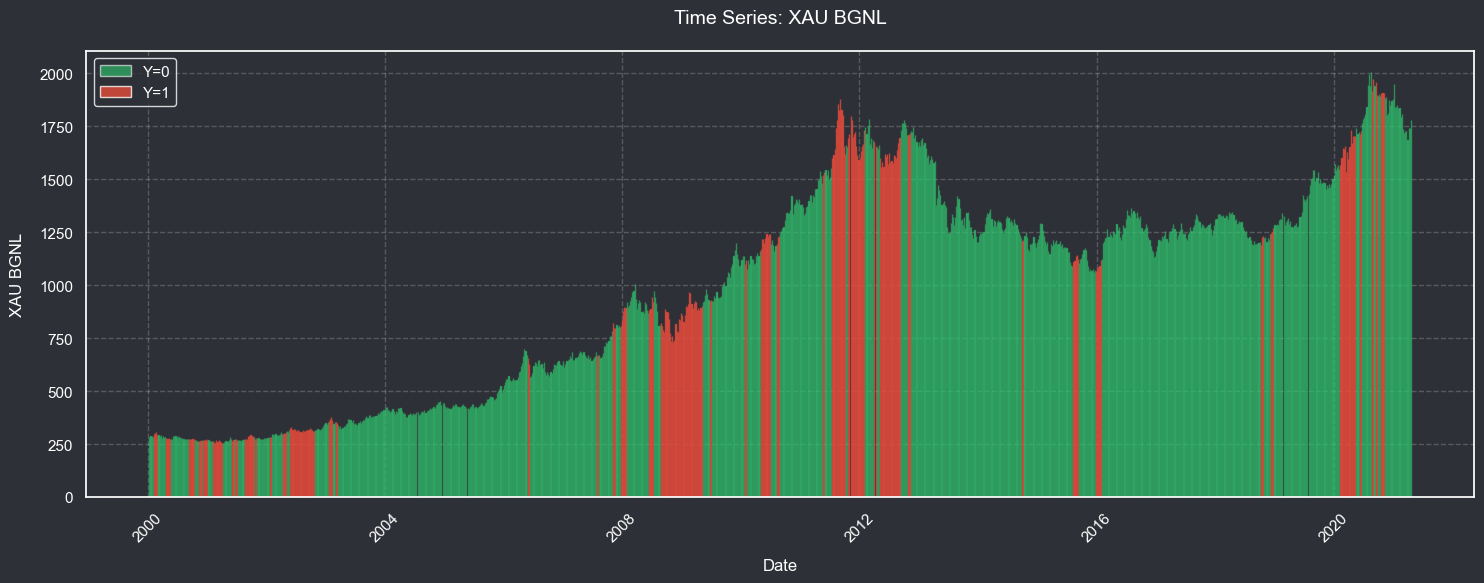

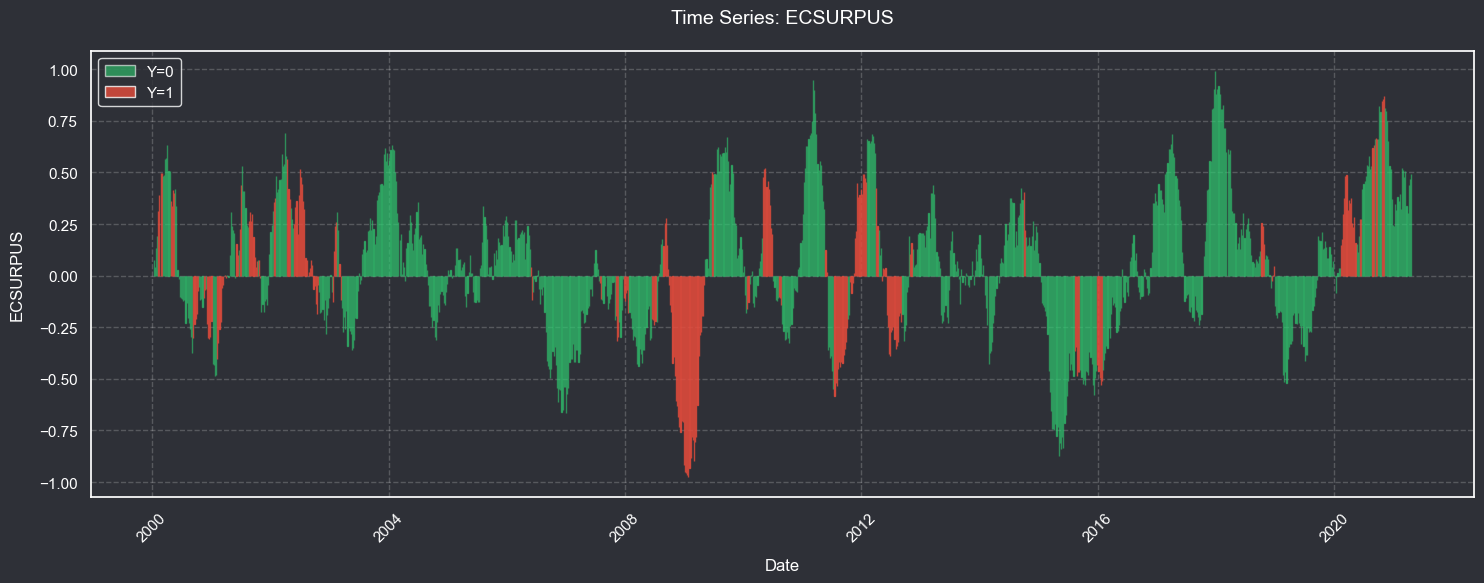

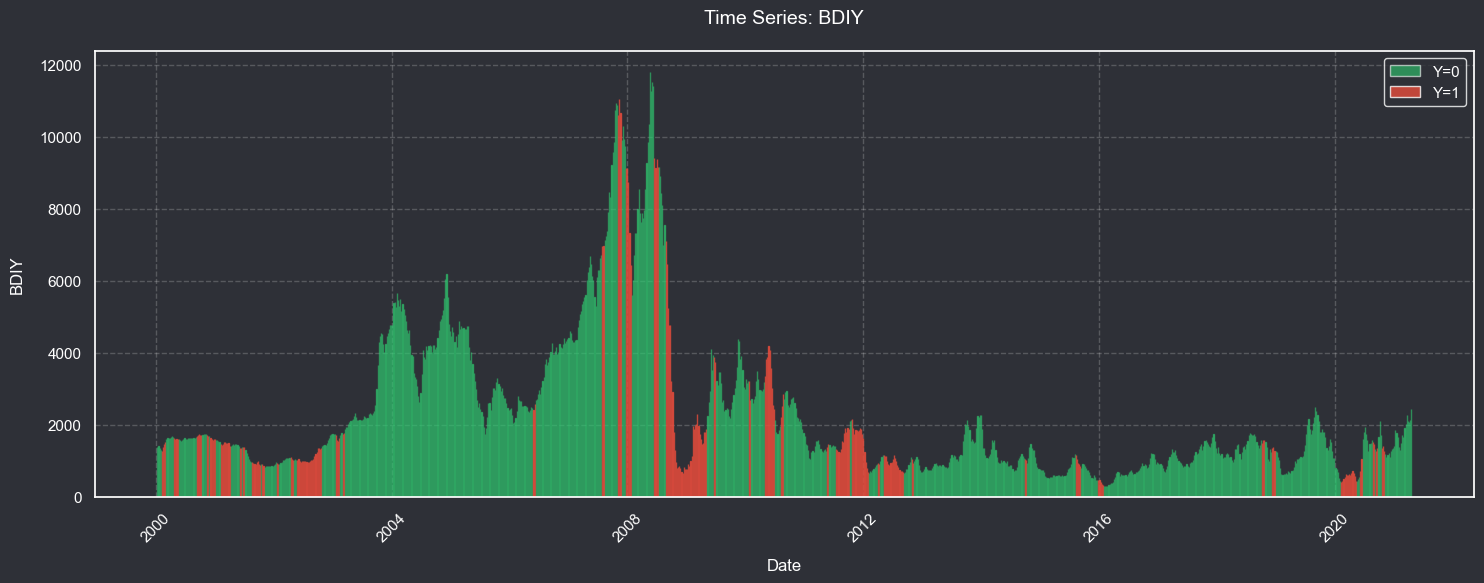

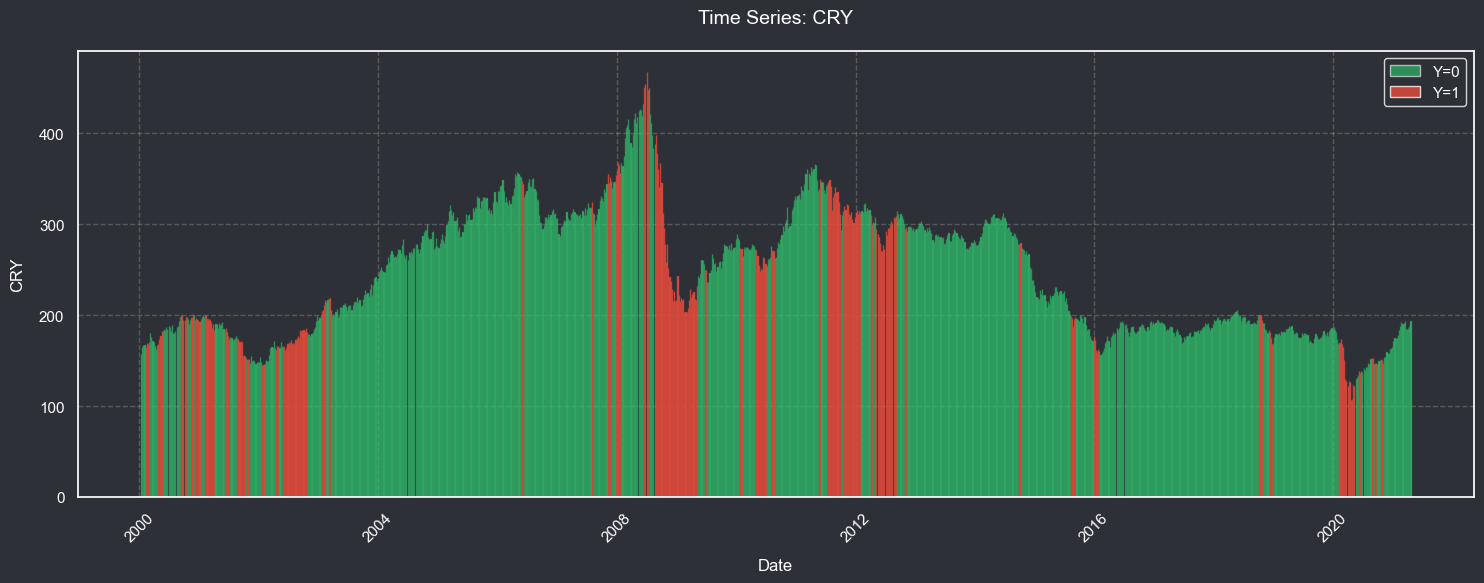

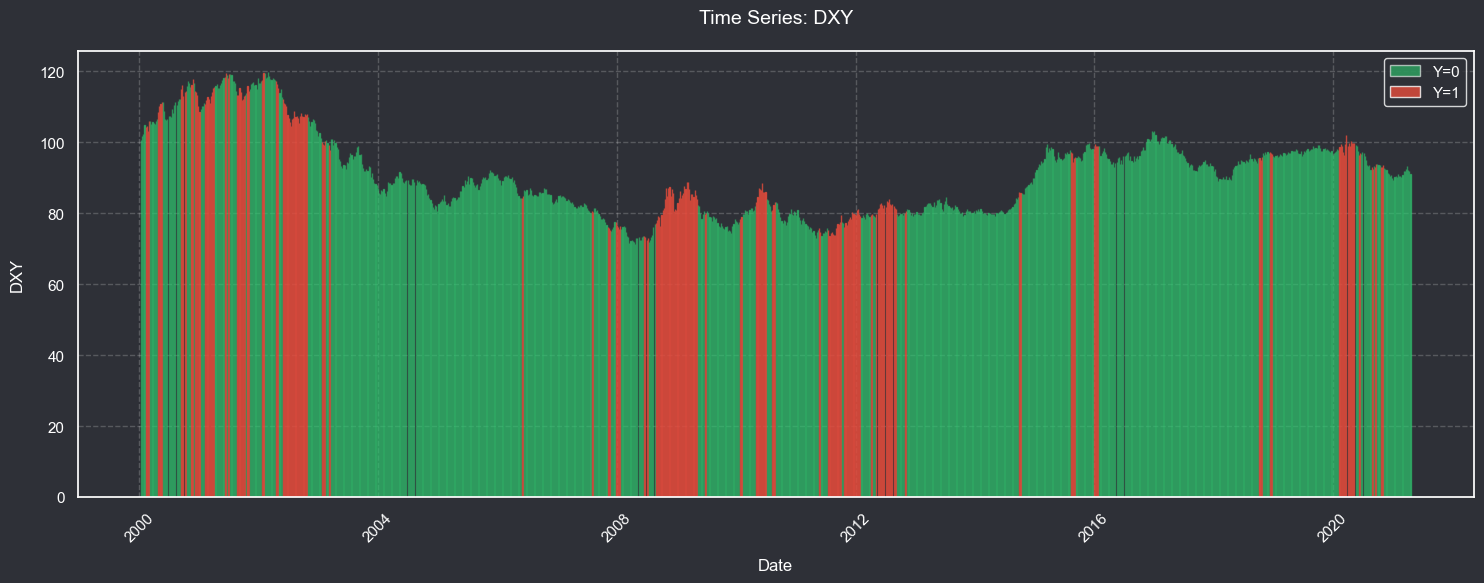

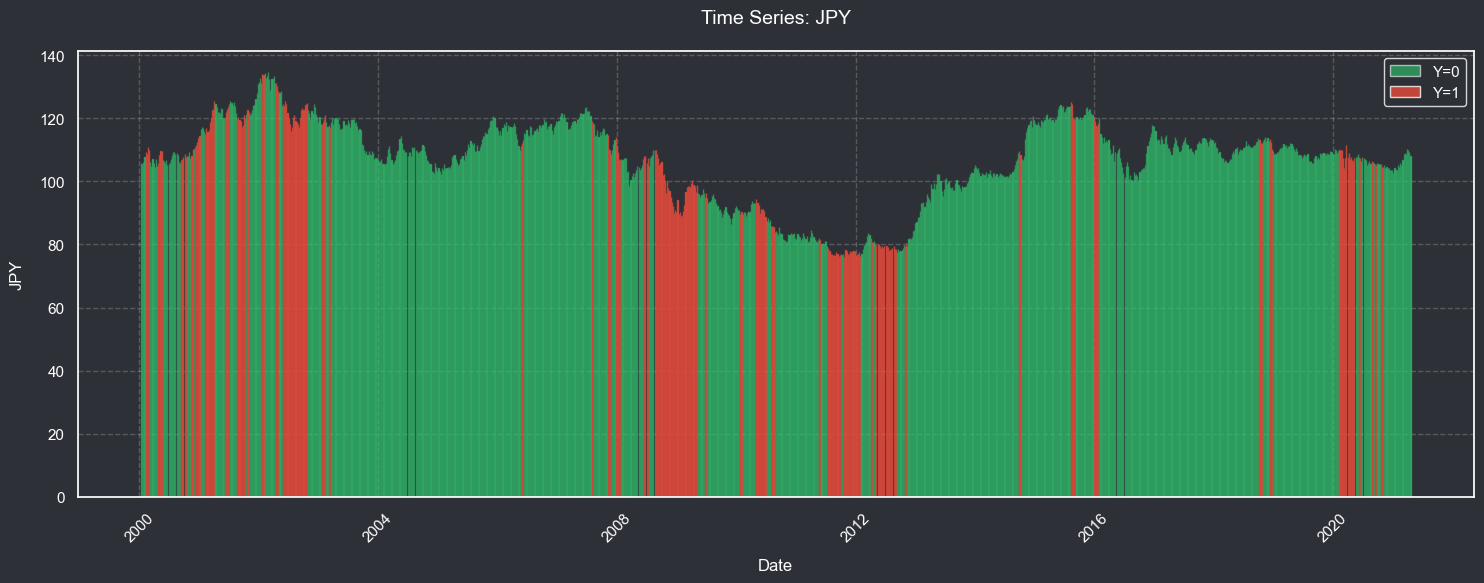

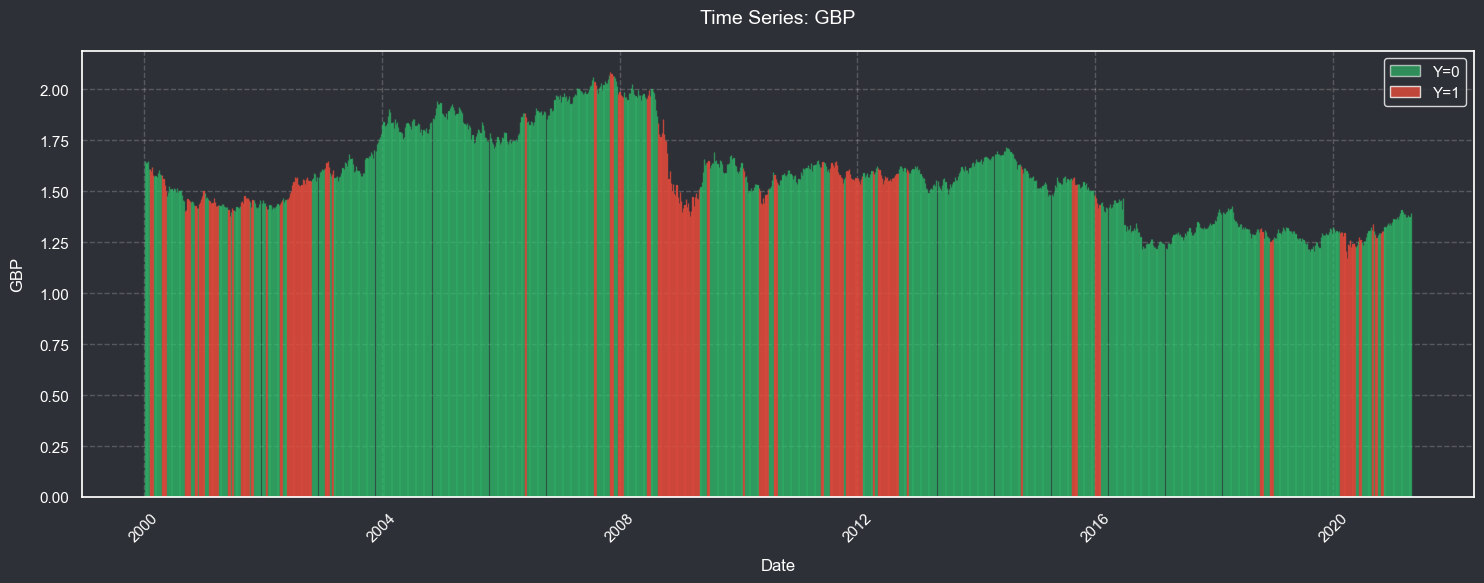

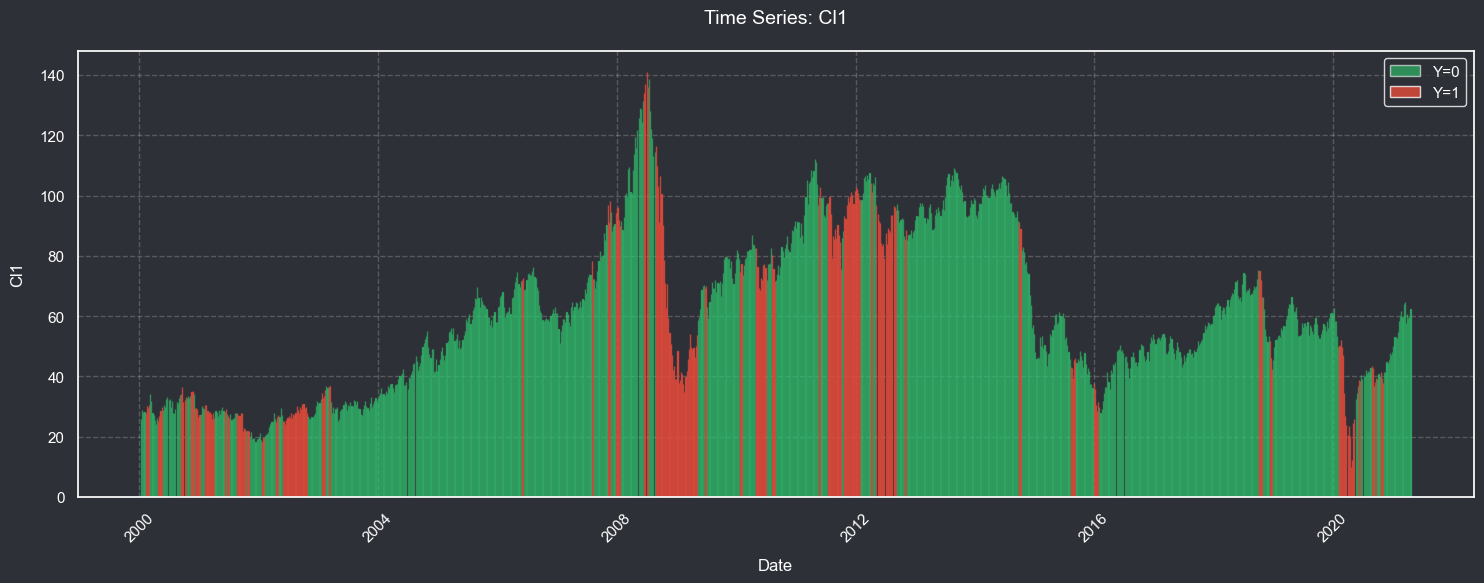

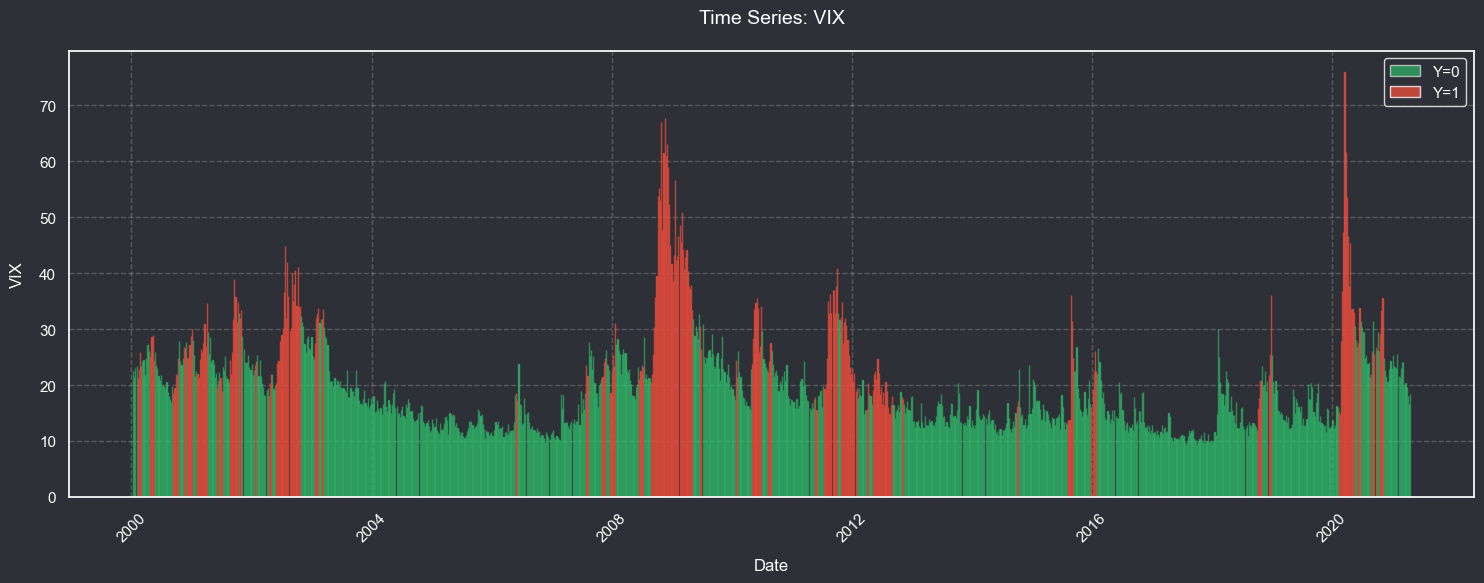

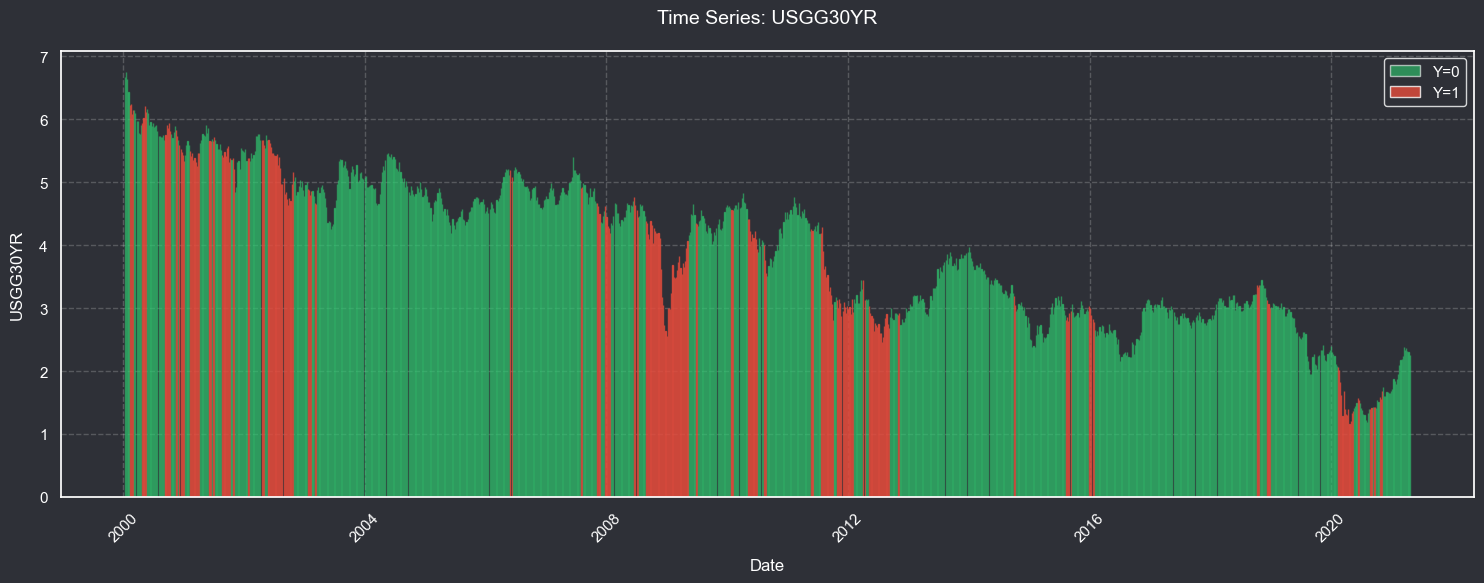

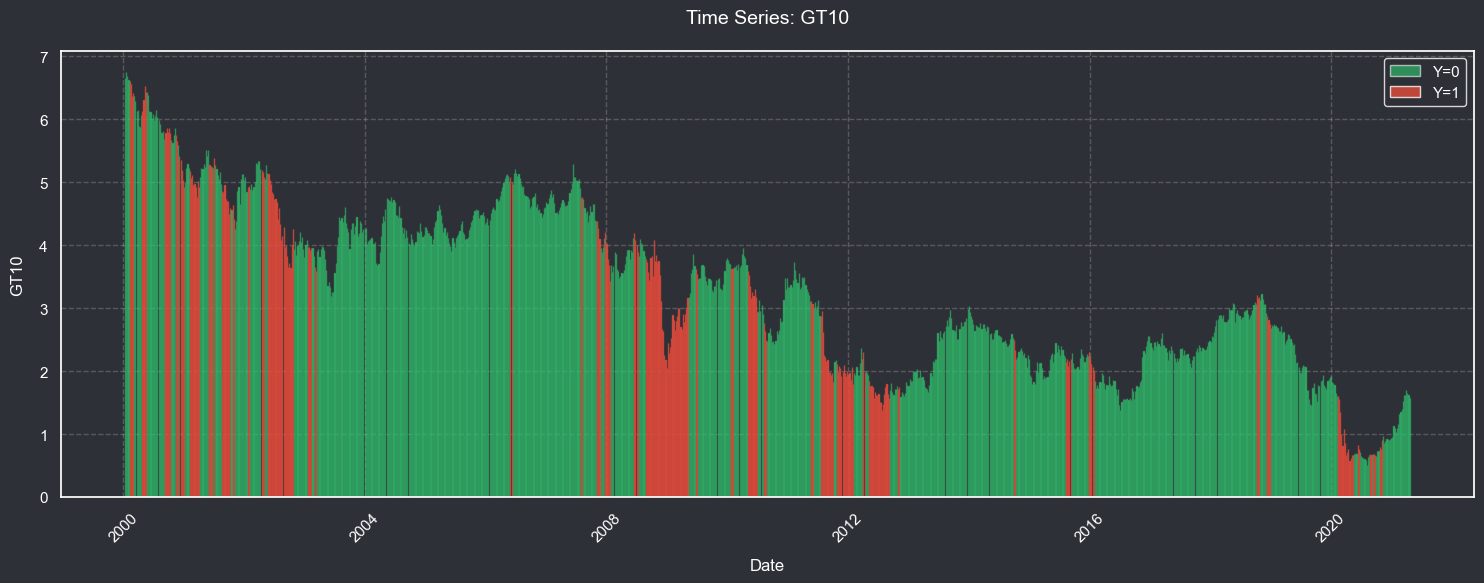

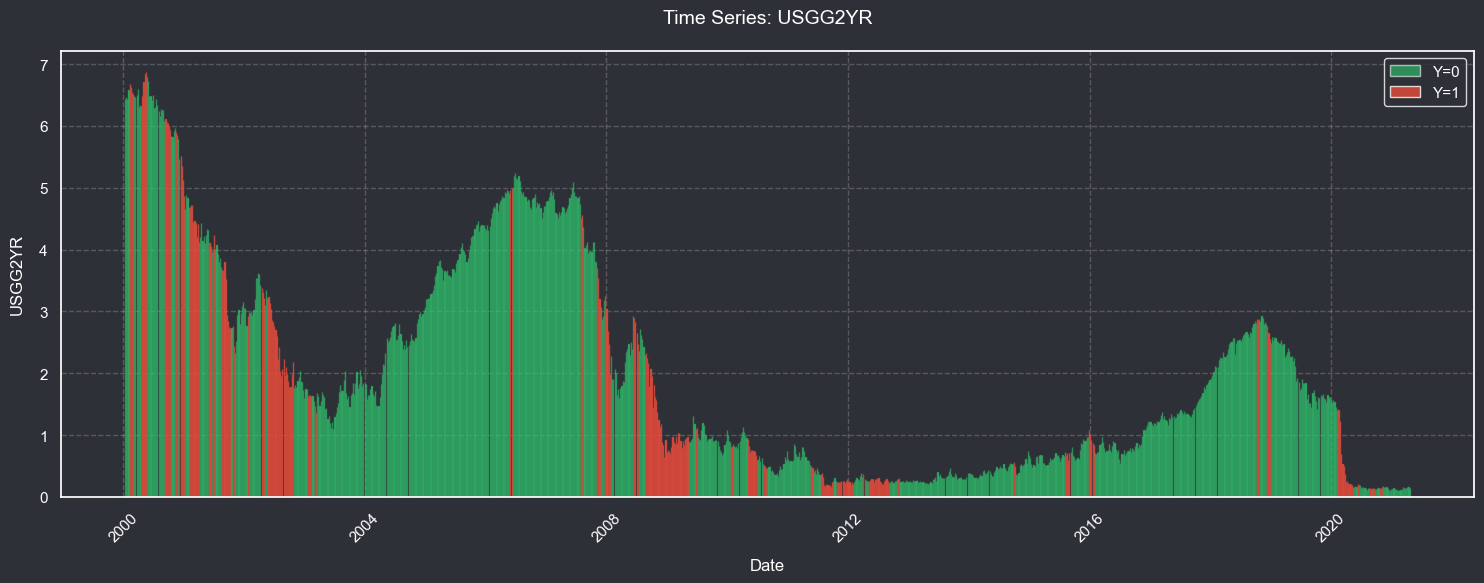

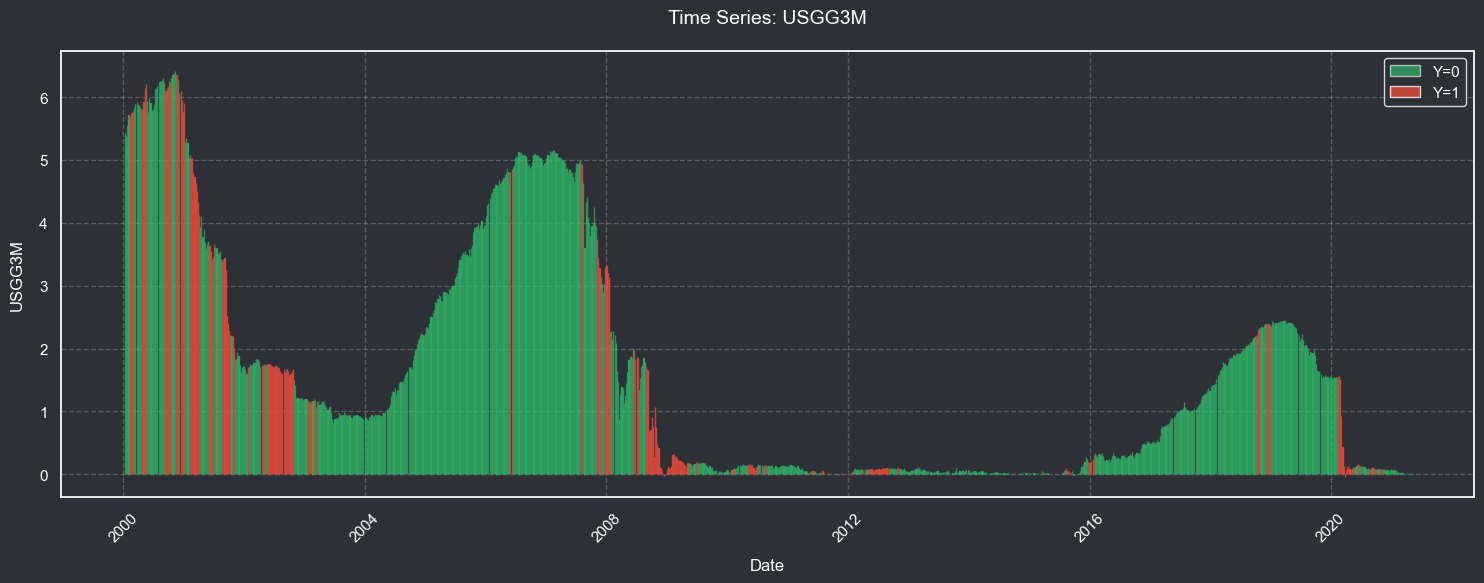

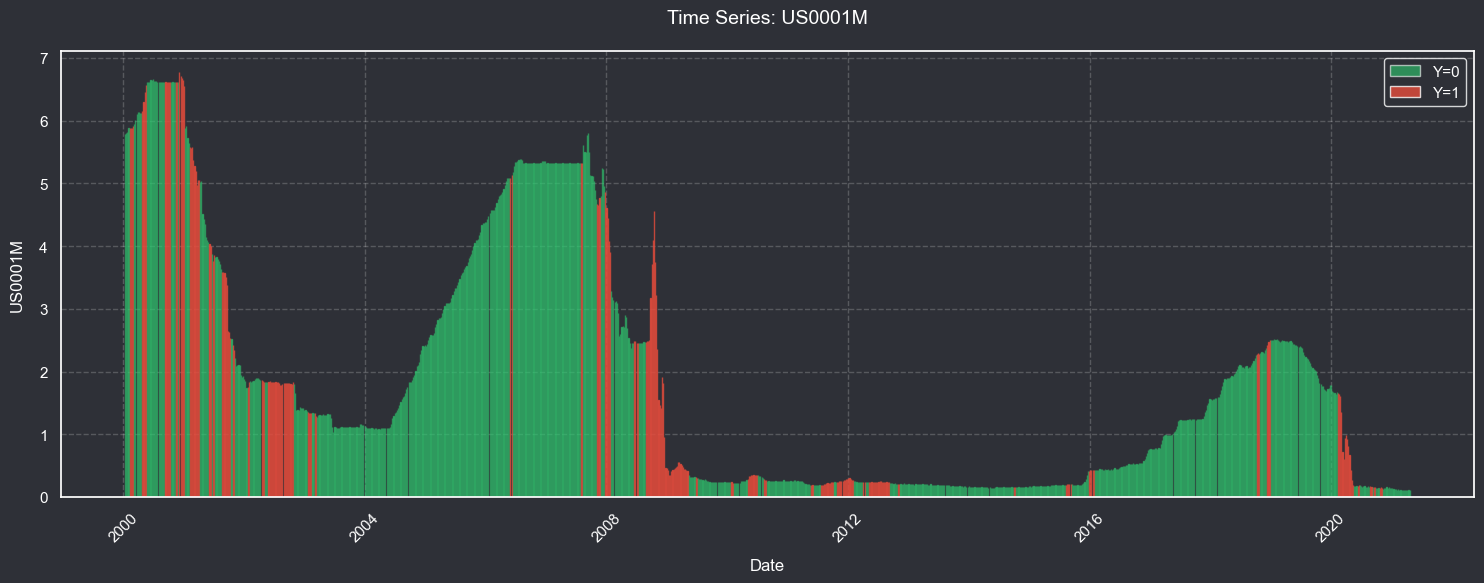

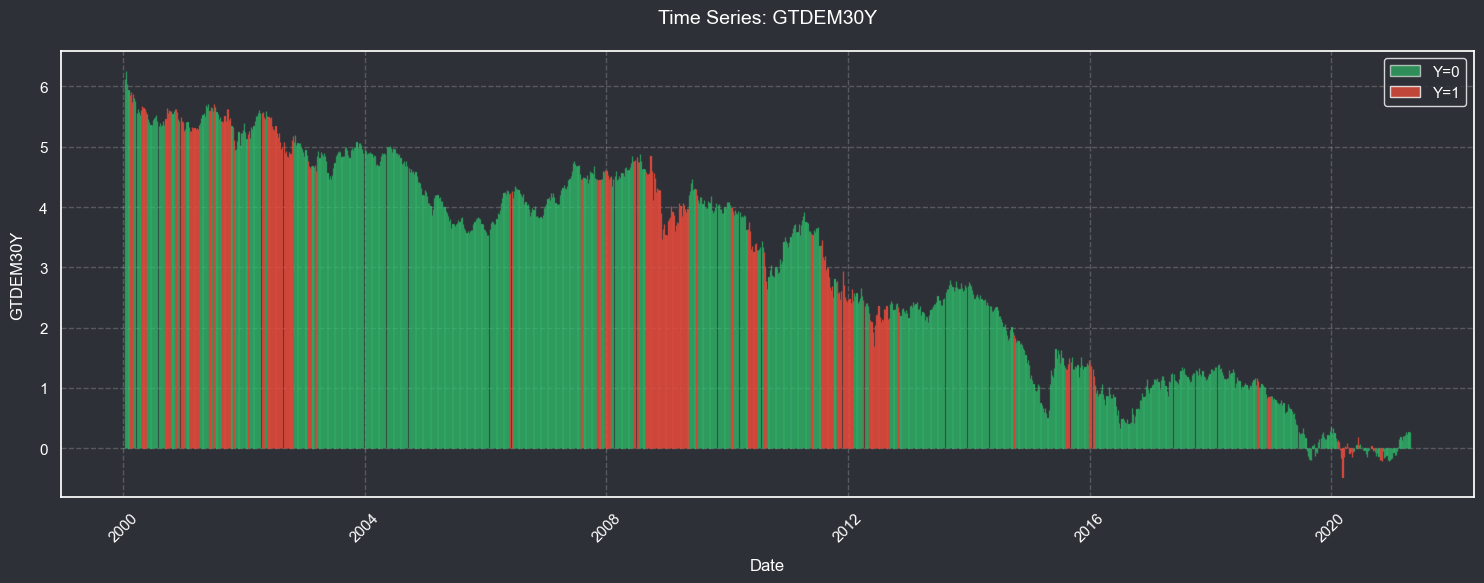

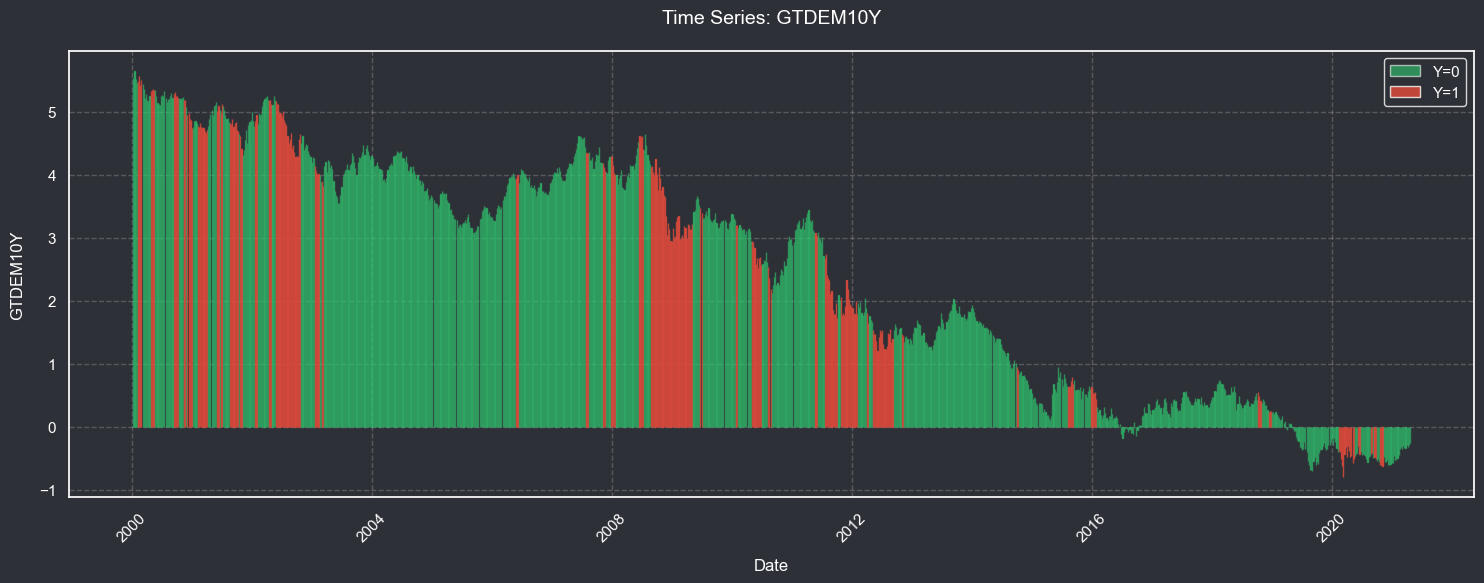

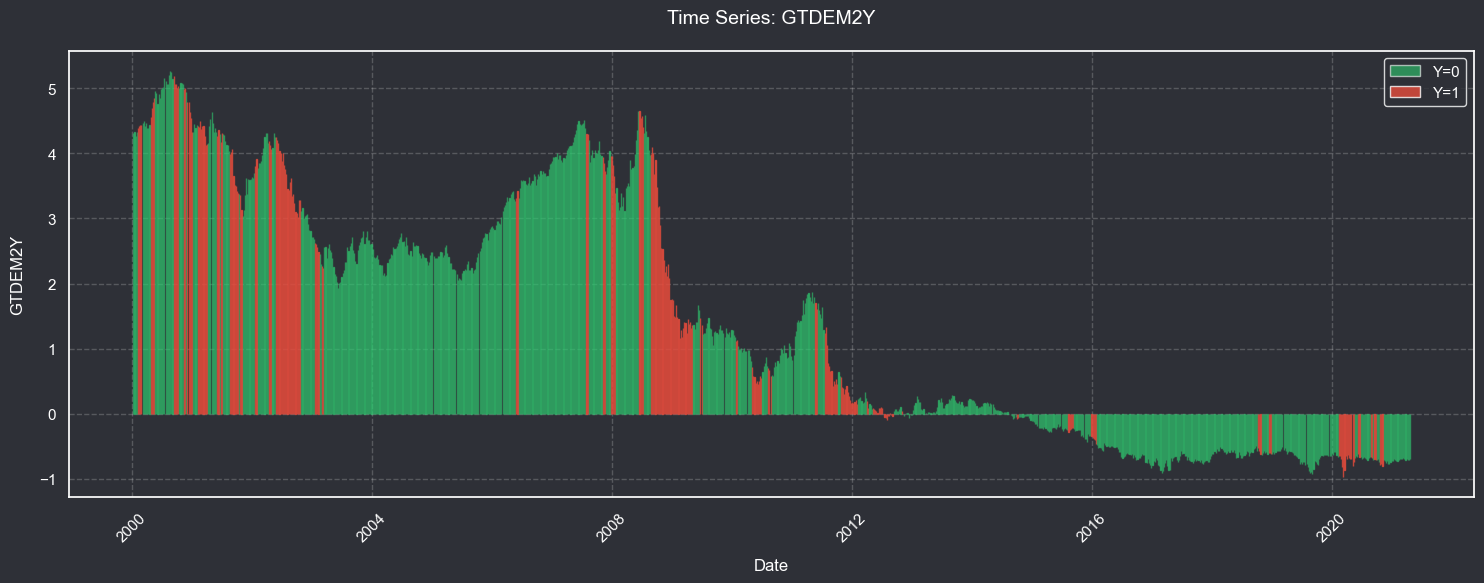

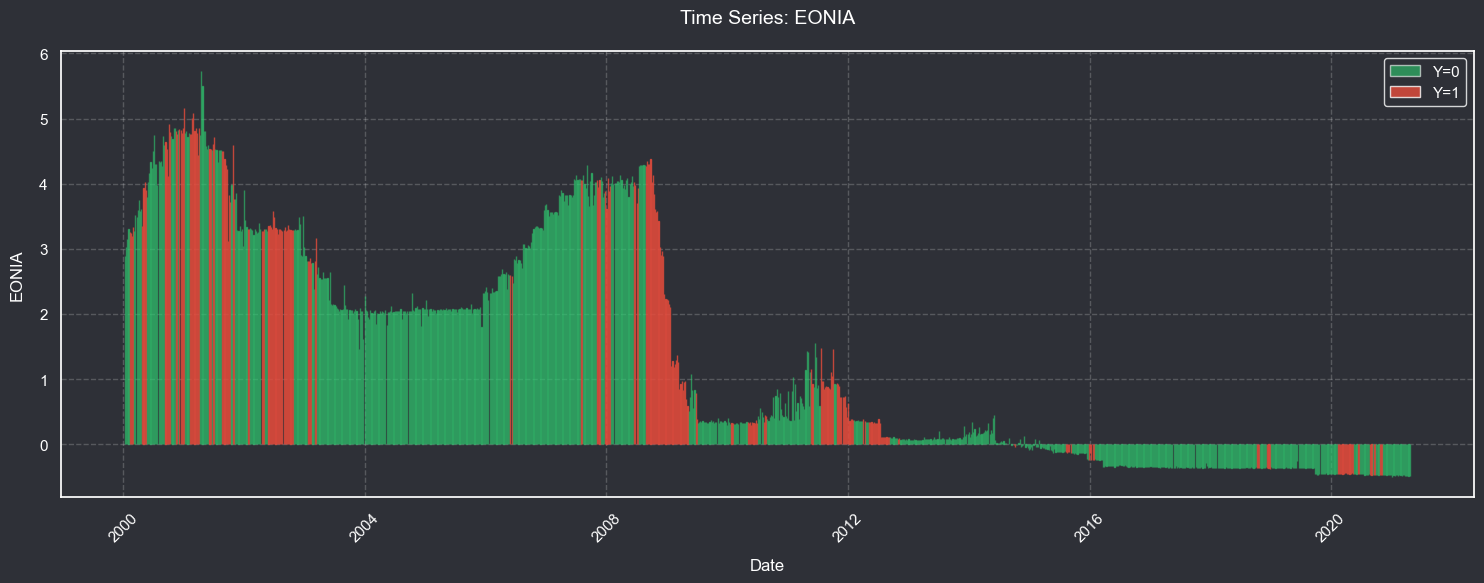

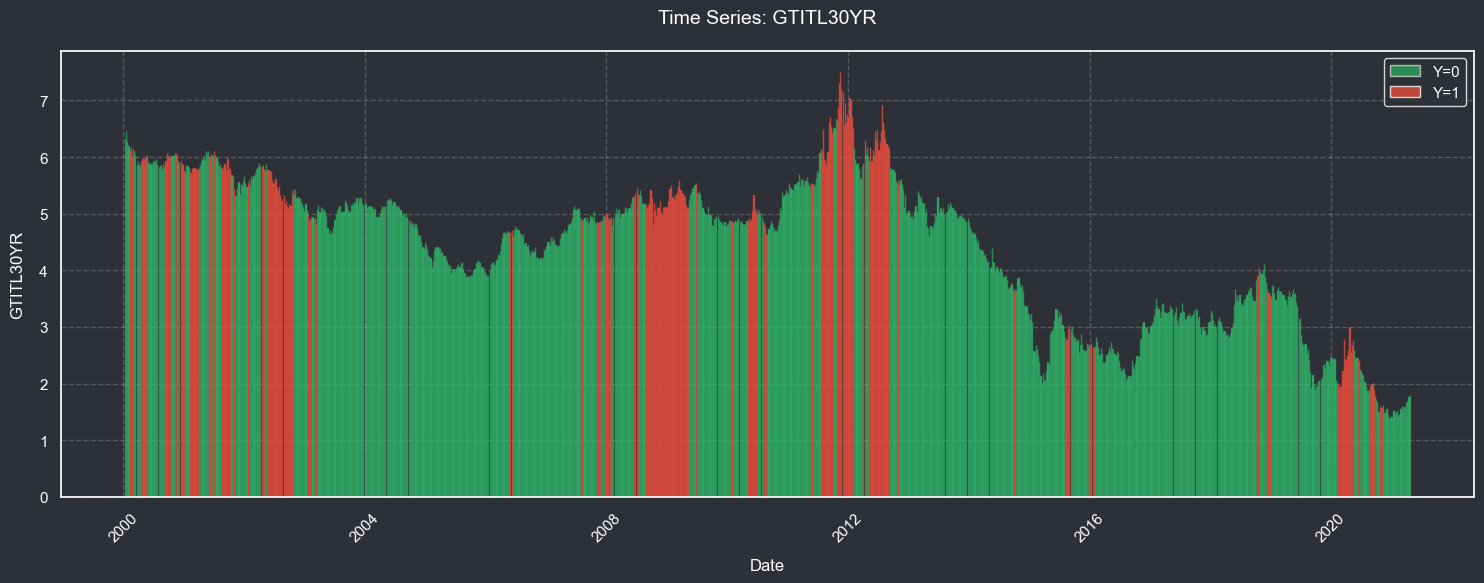

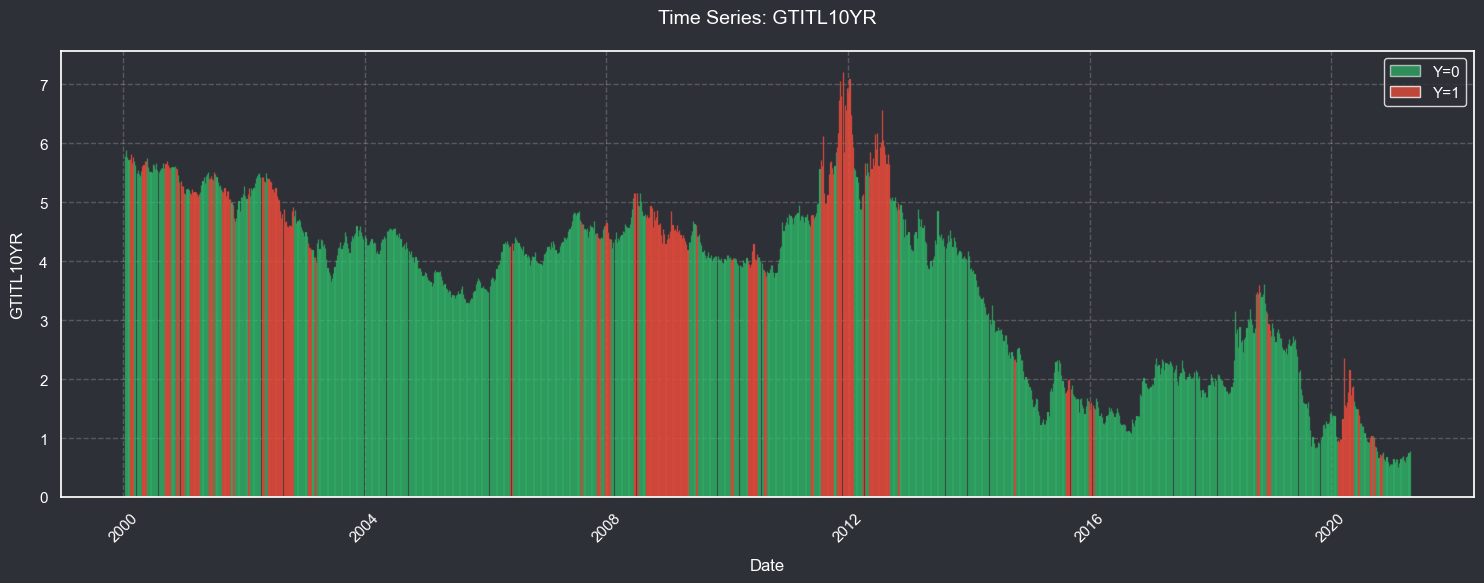

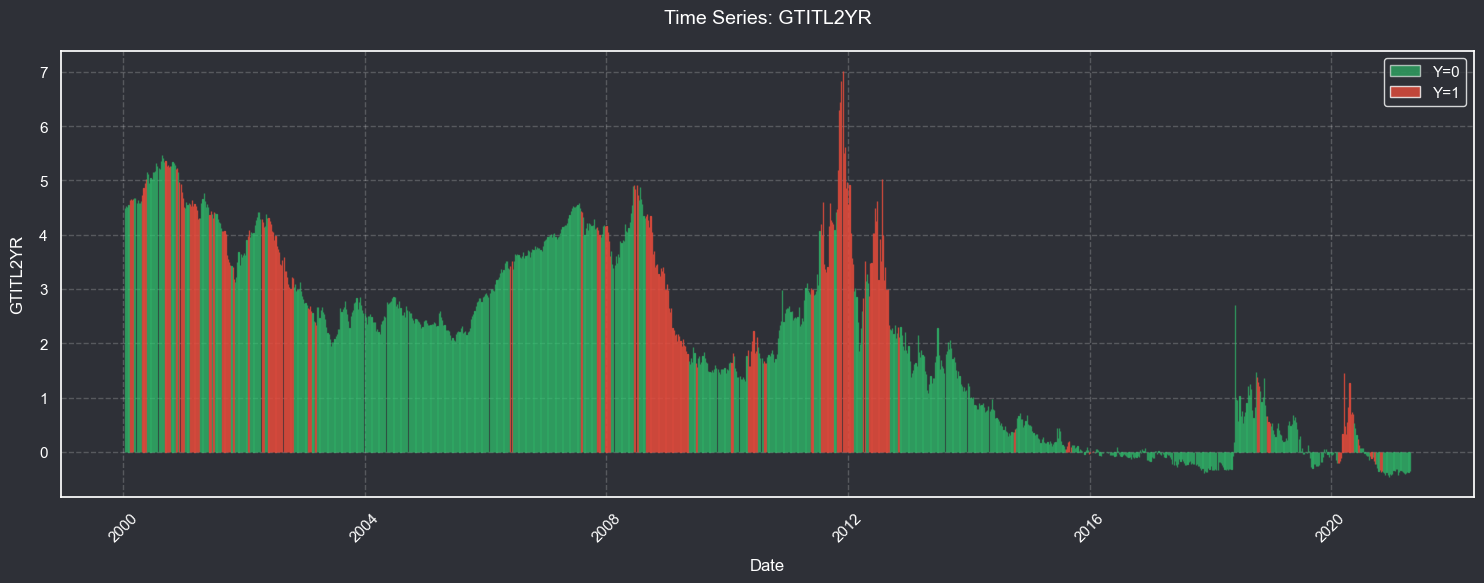

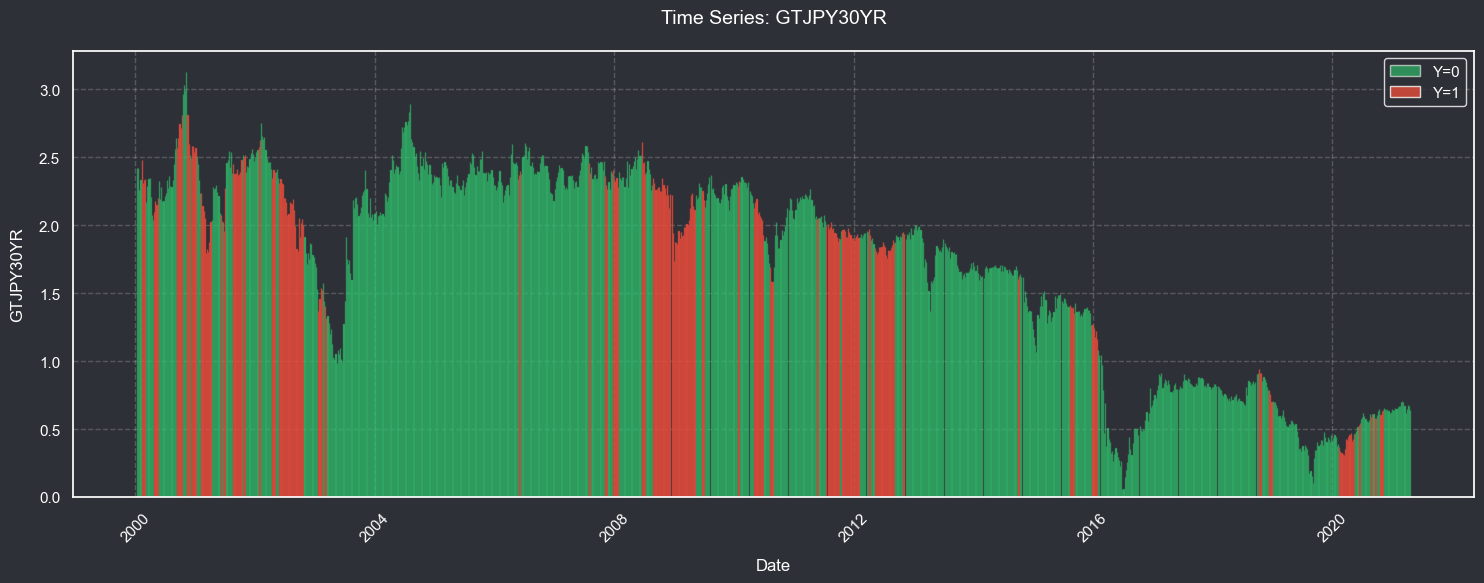

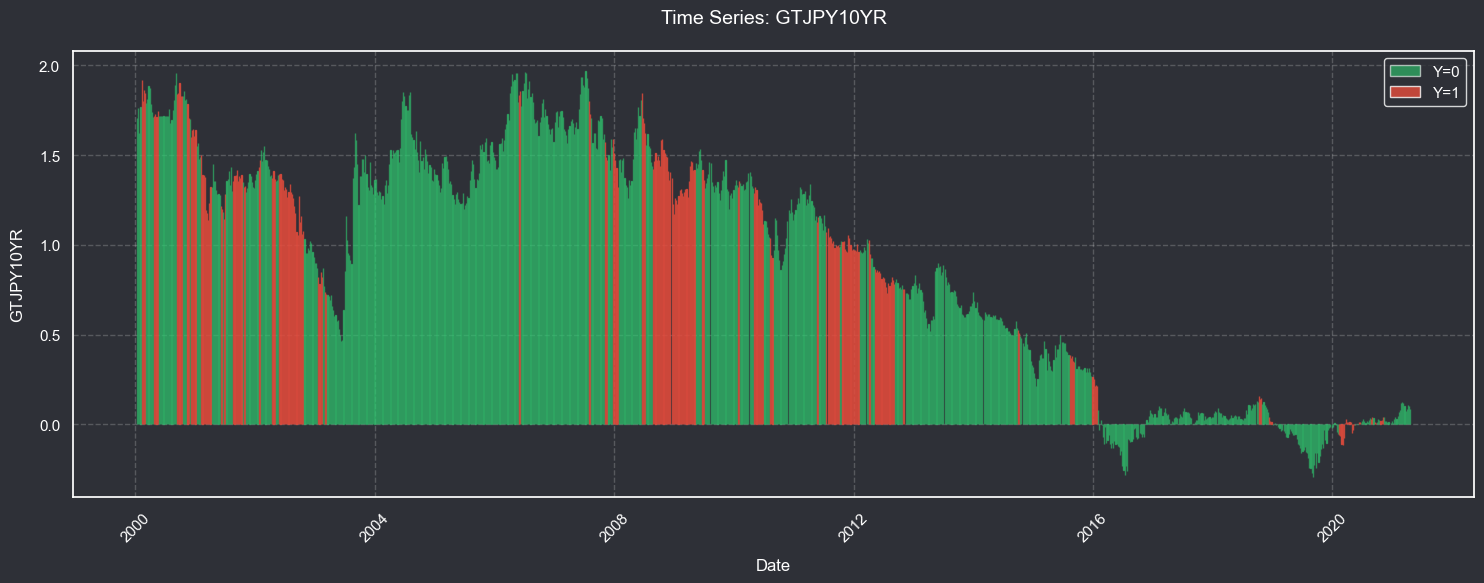

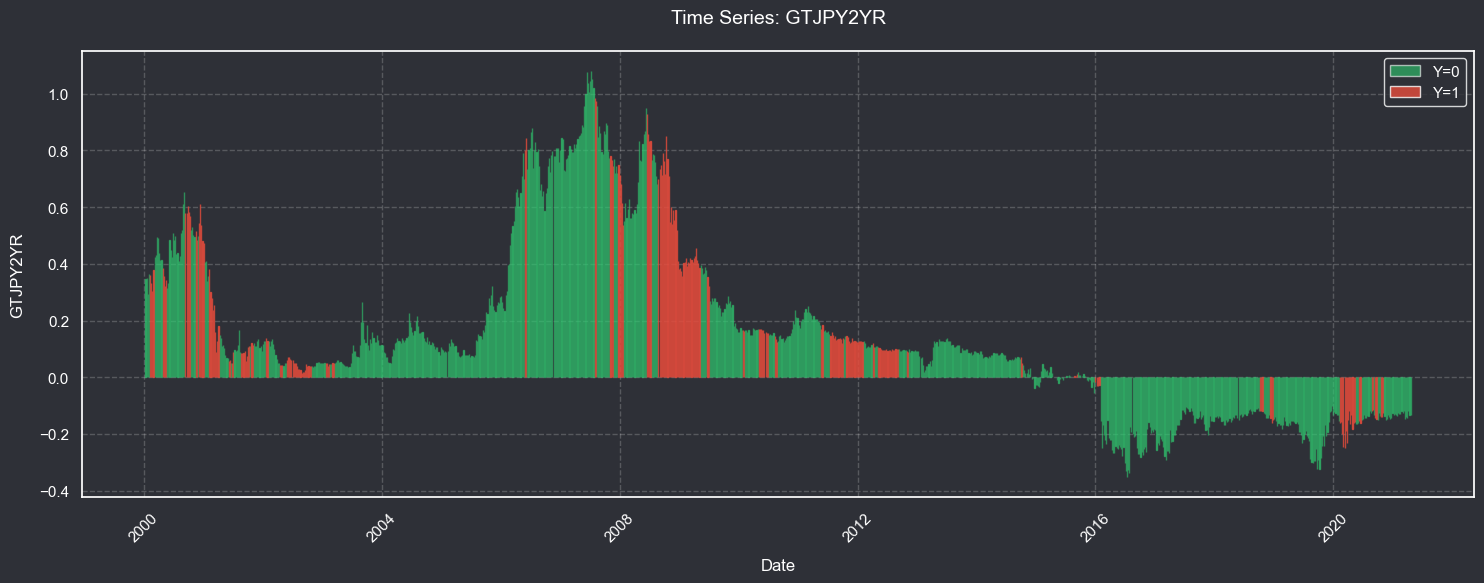

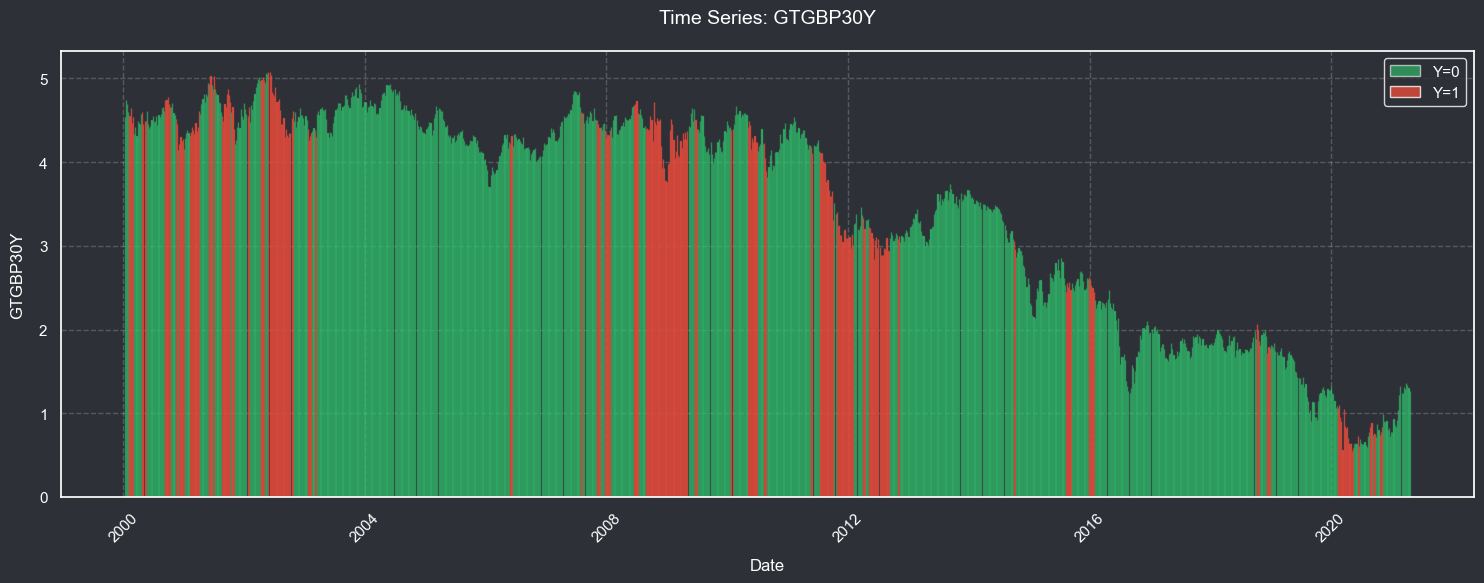

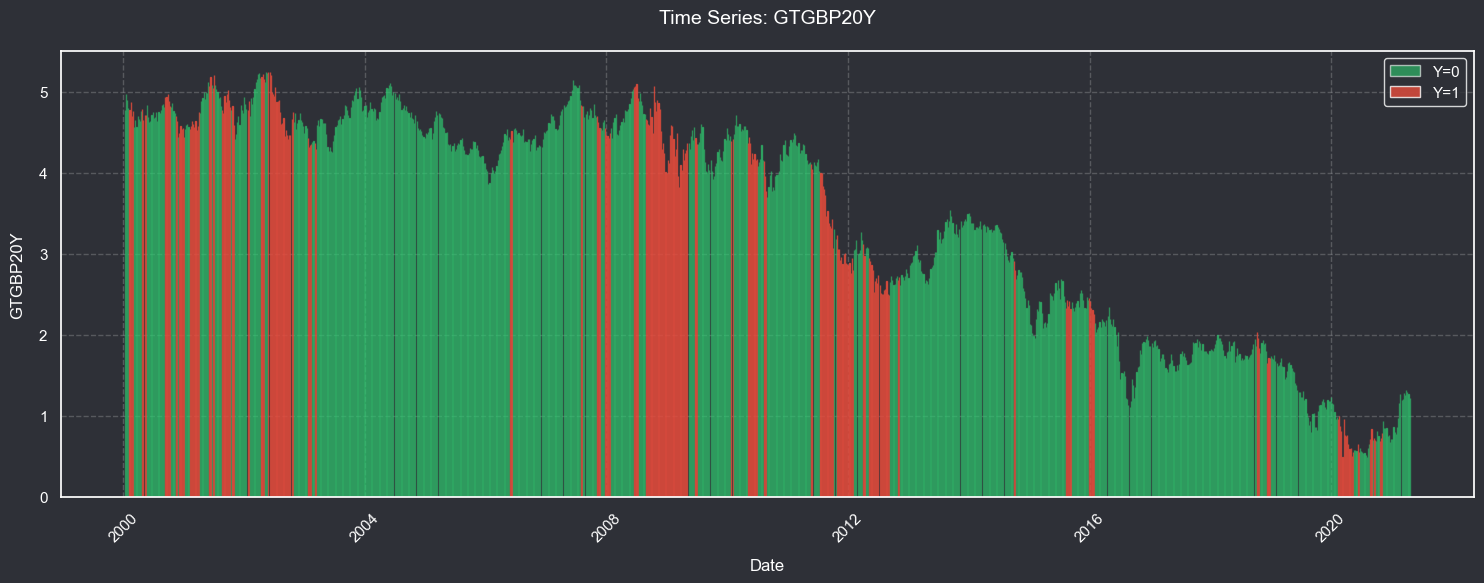

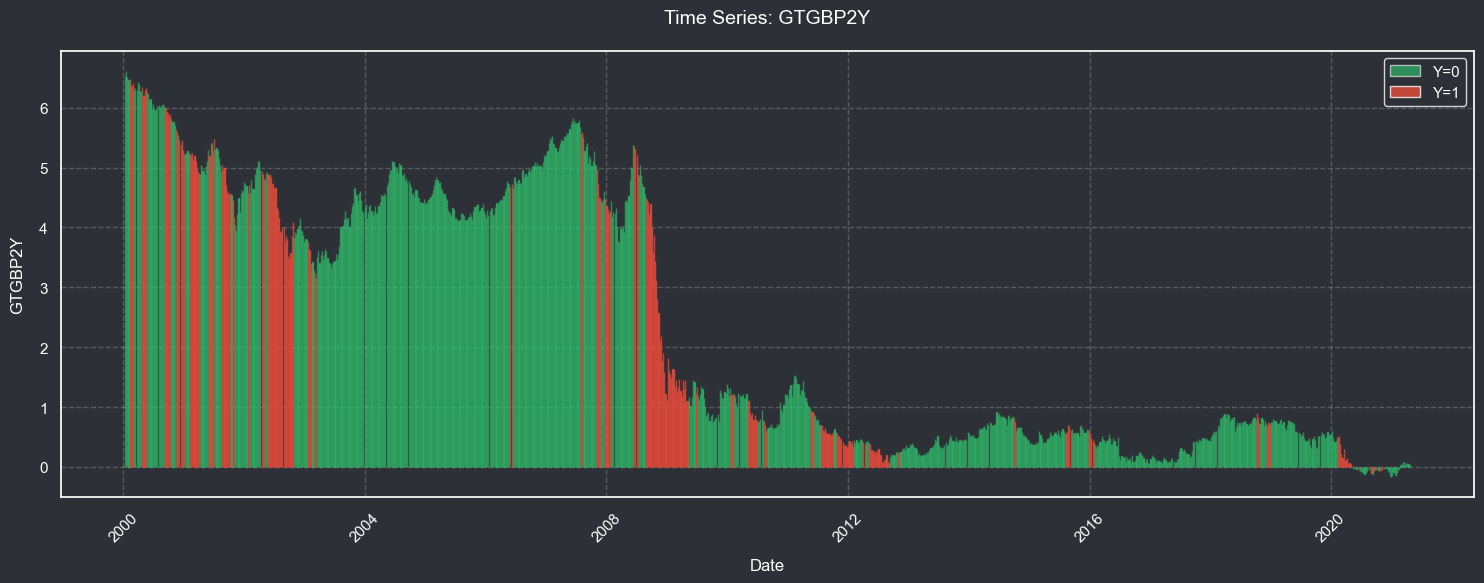

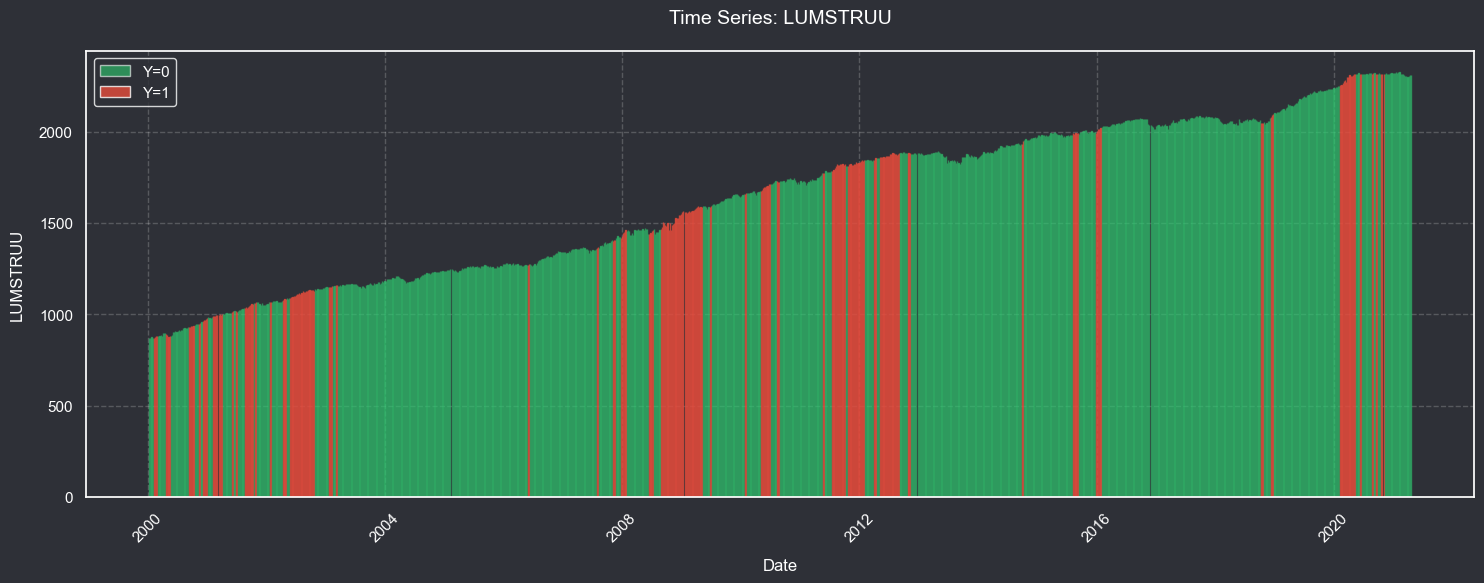

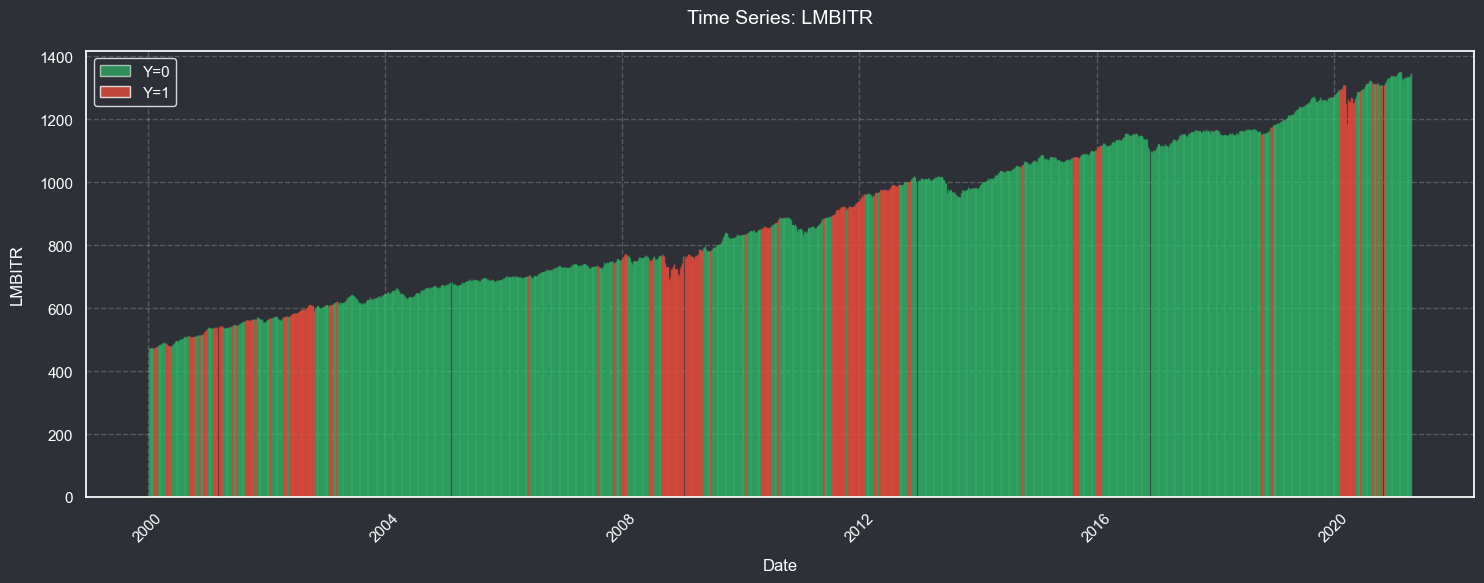

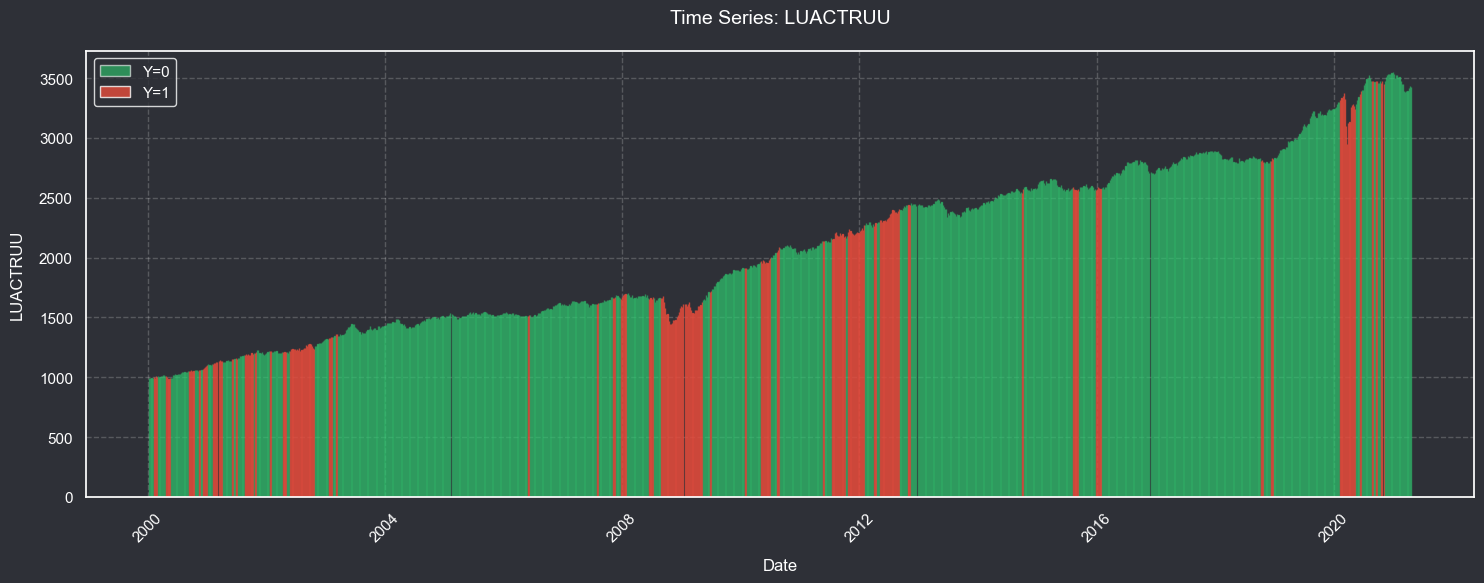

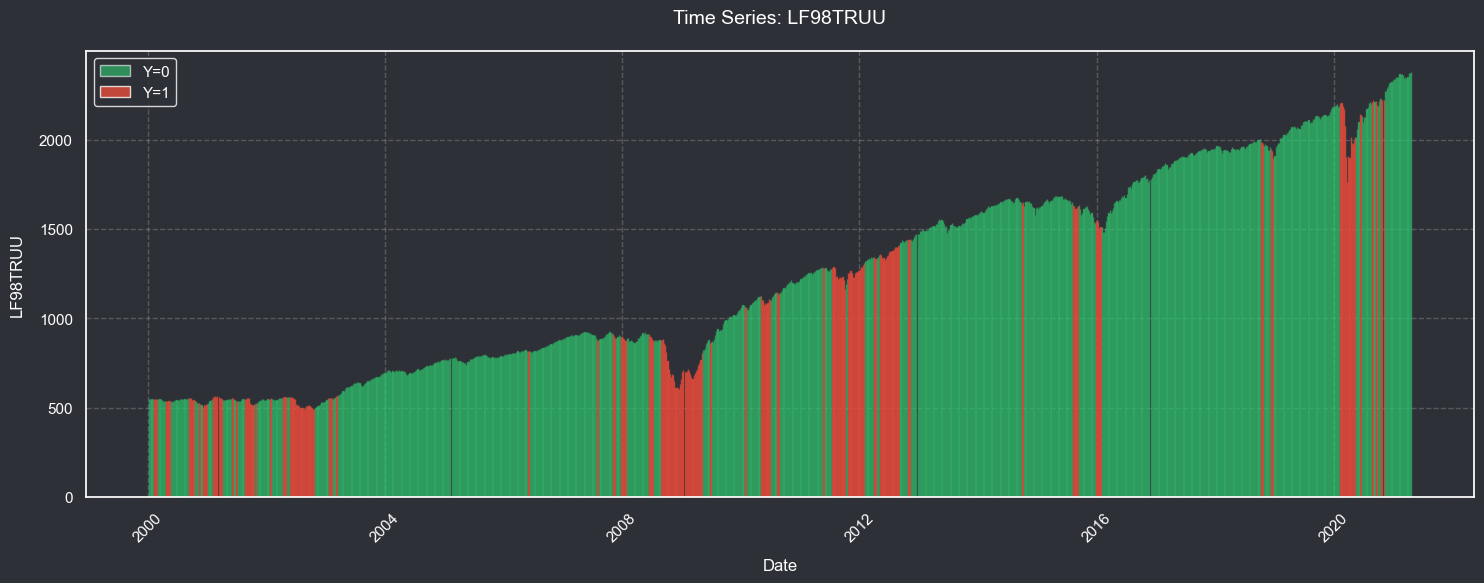

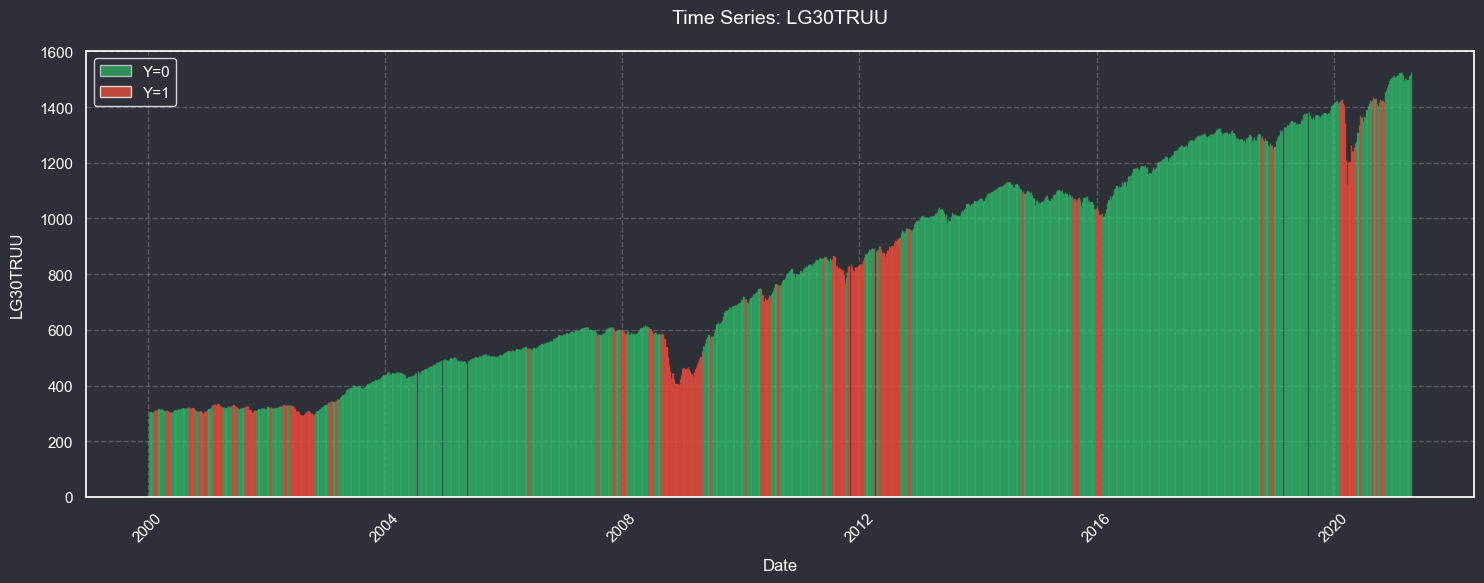

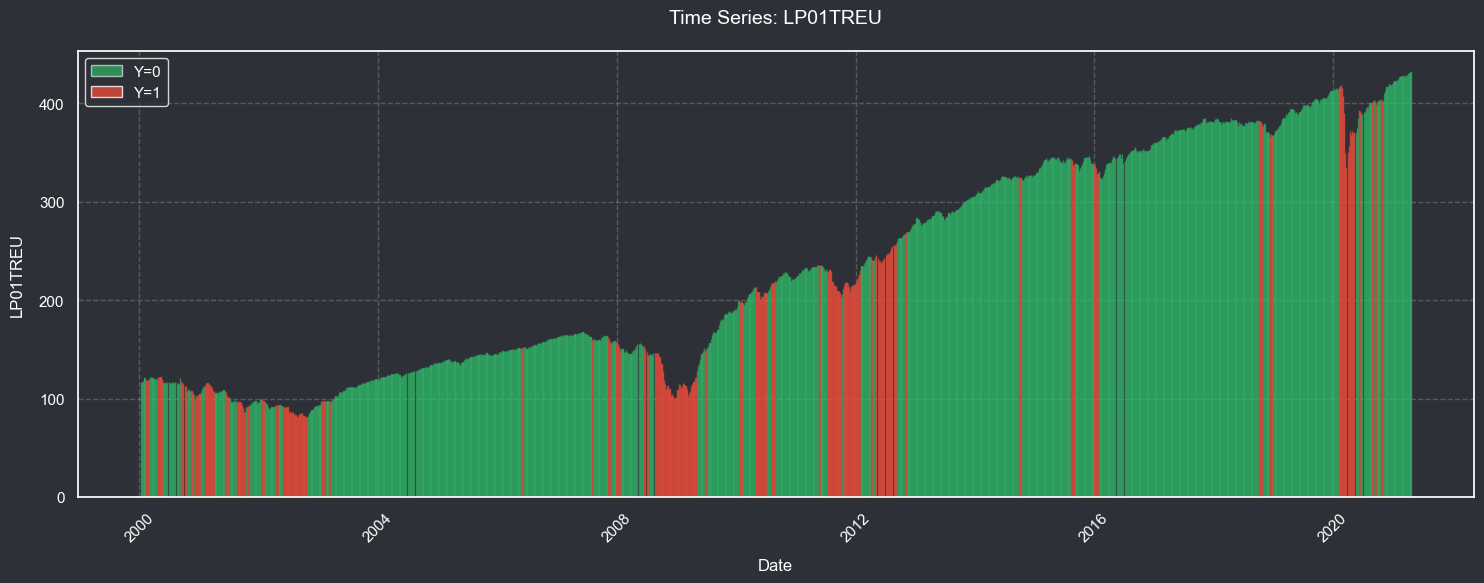

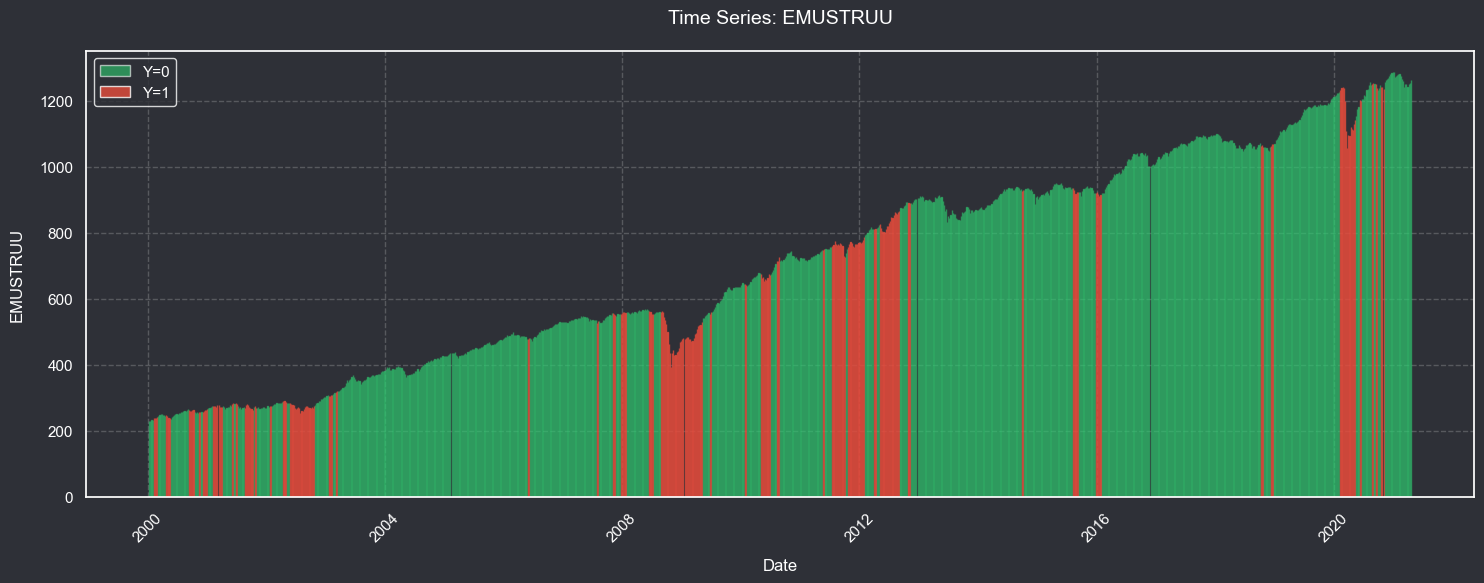

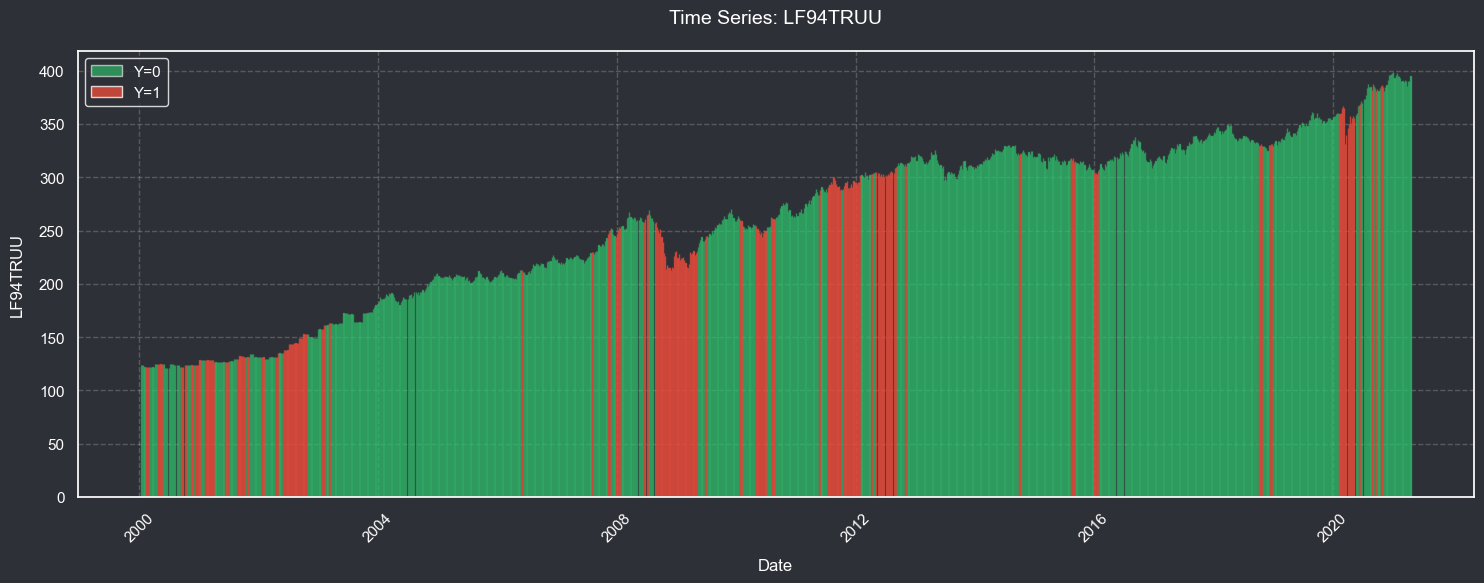

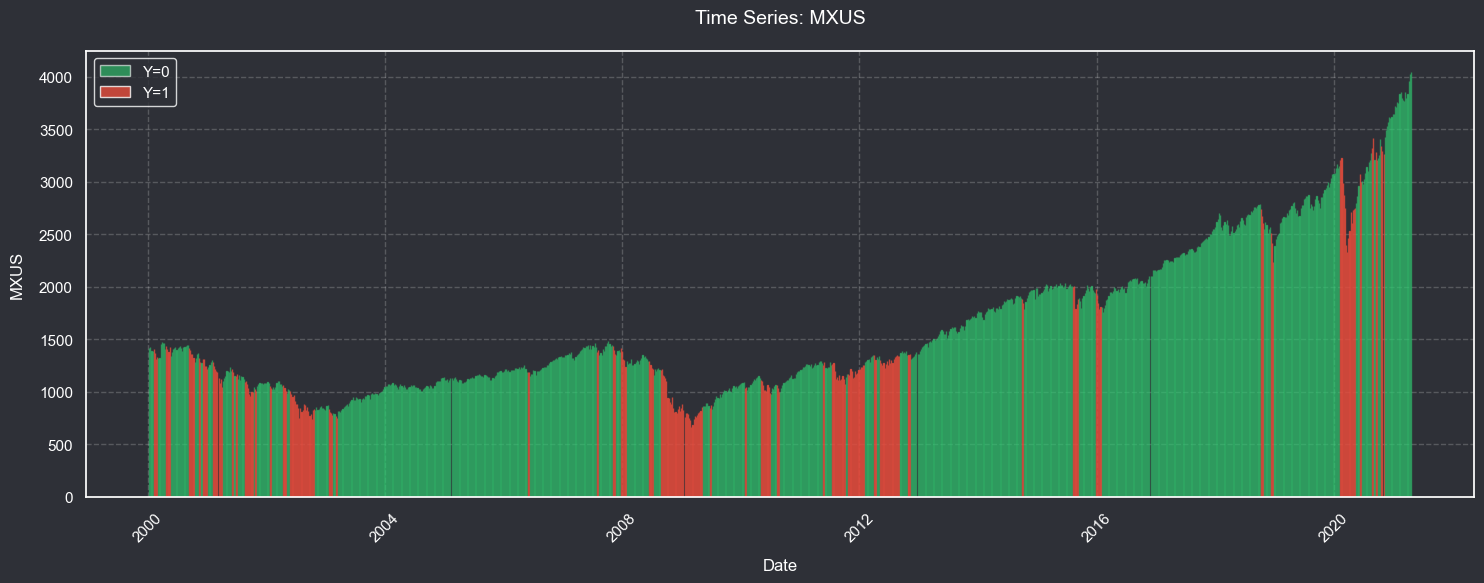

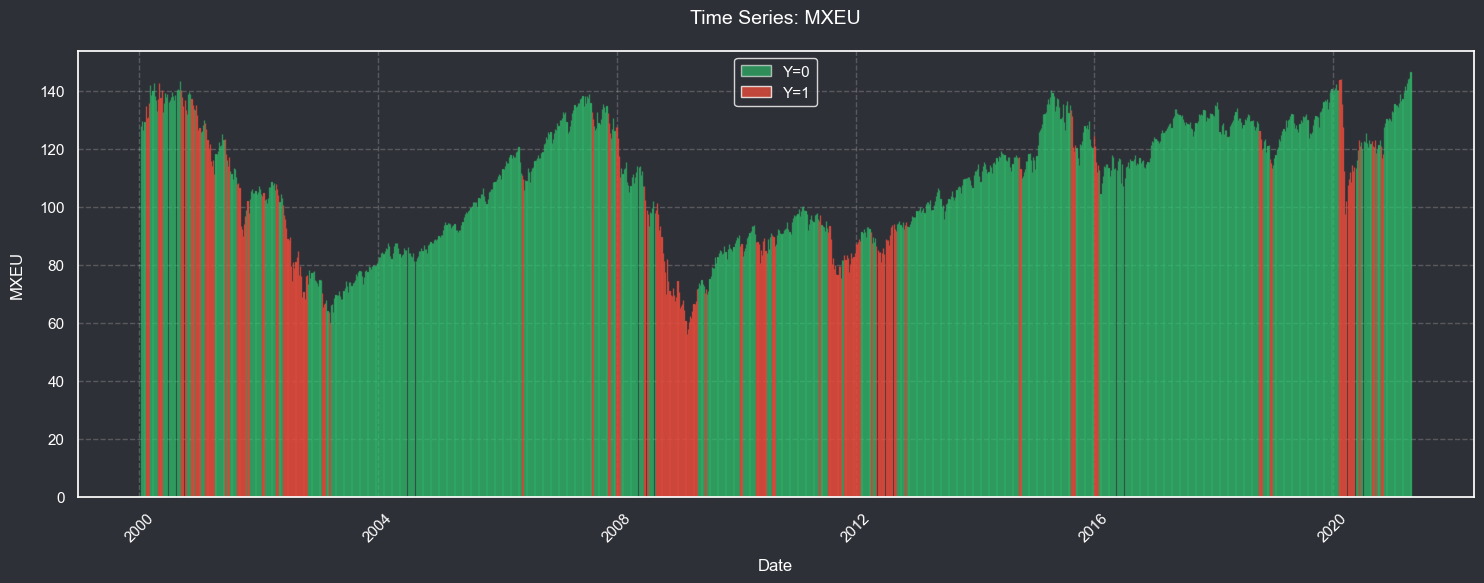

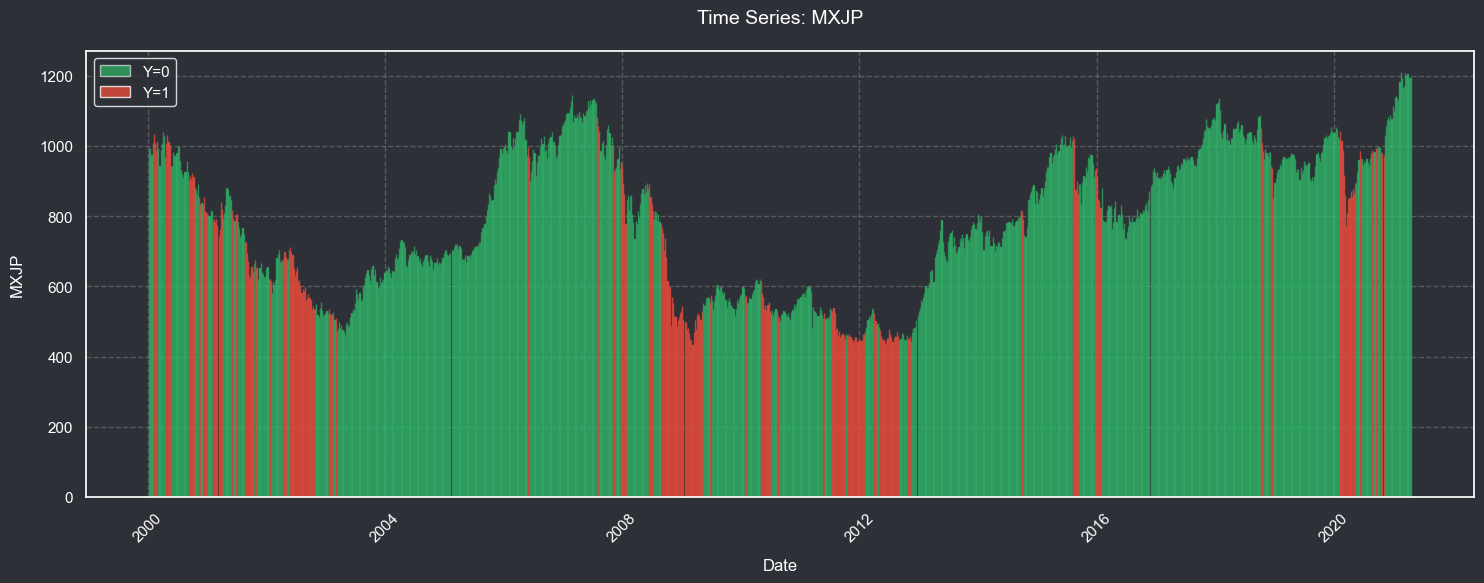

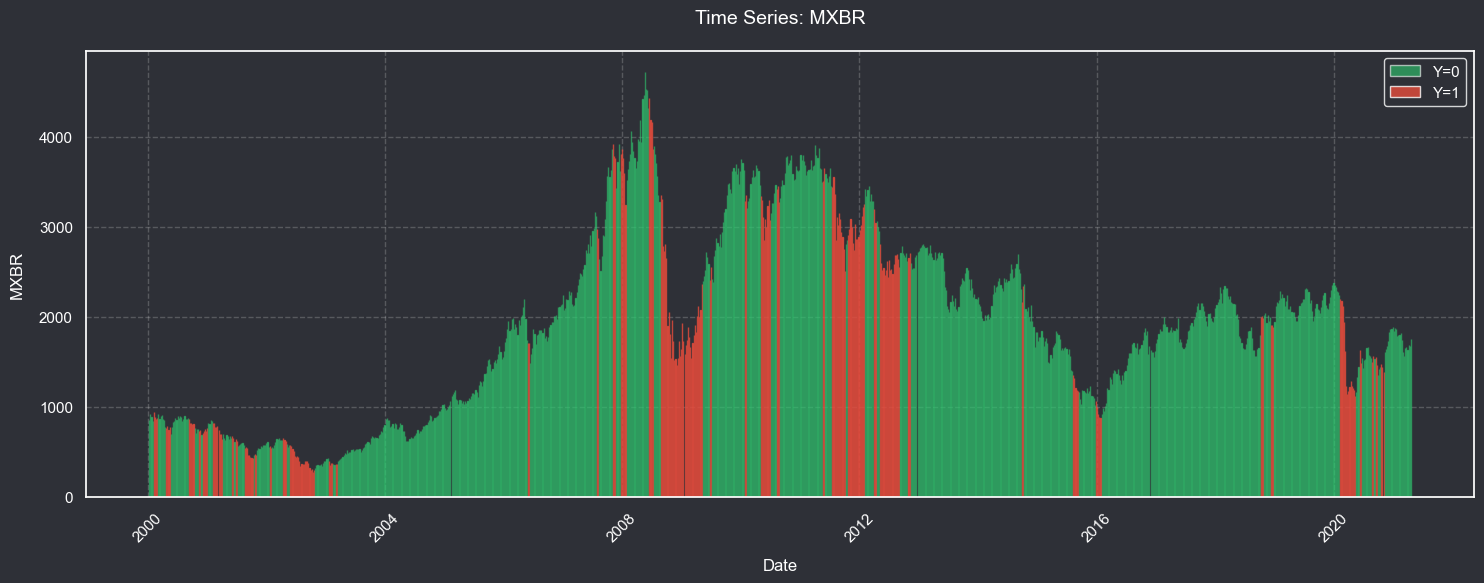

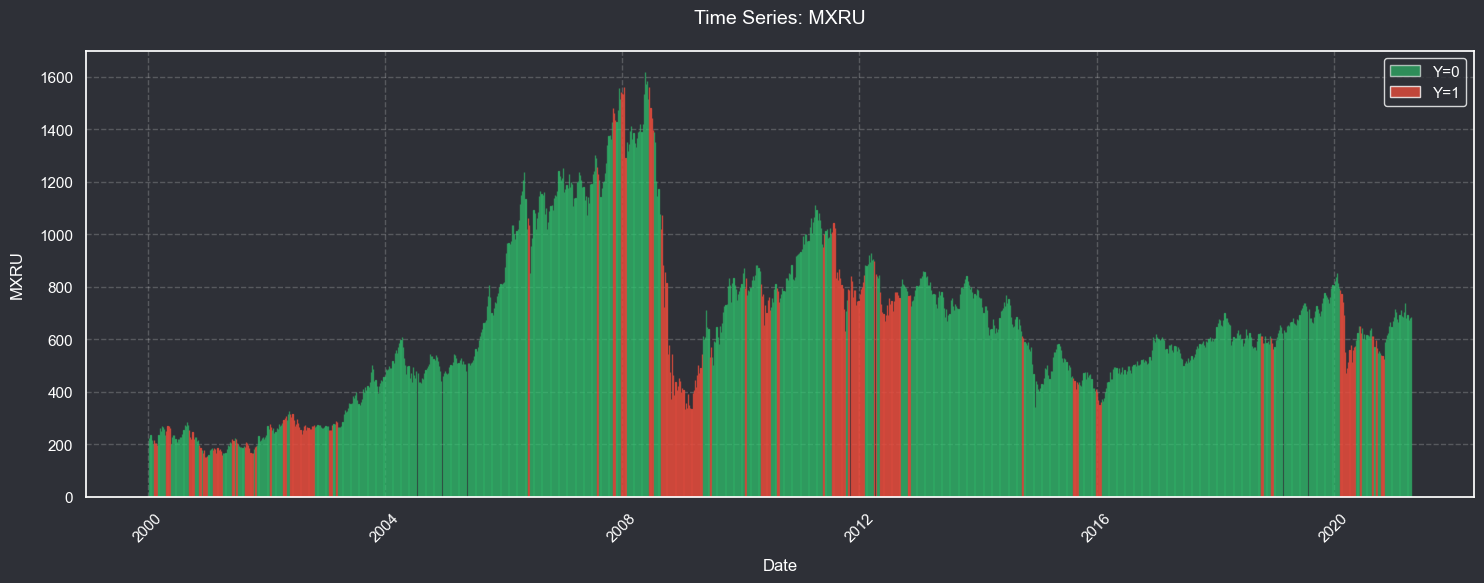

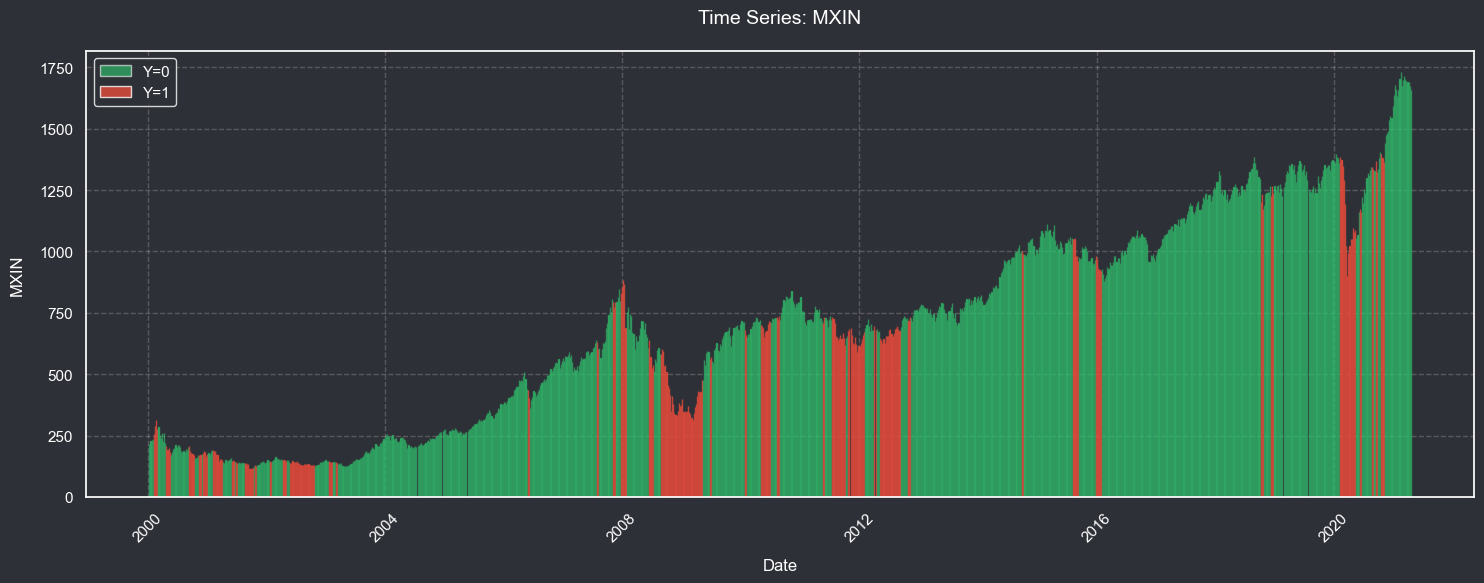

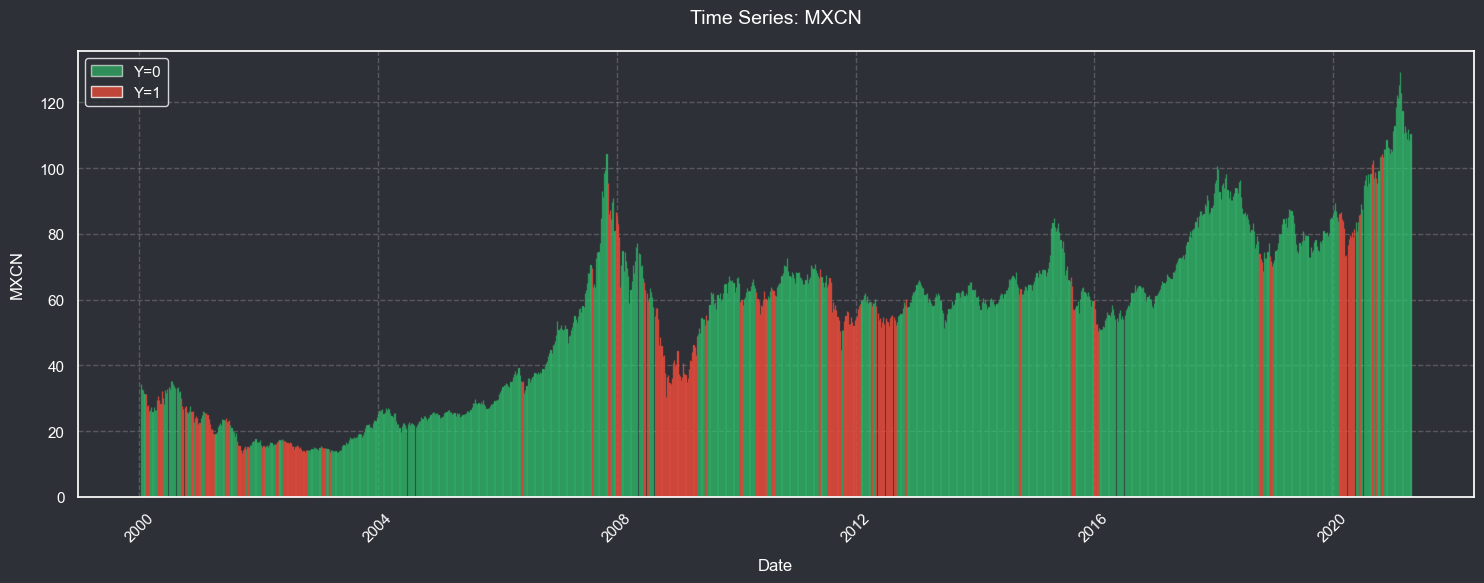

In [47]:
# Convert 'Data' column to datetime if not already done
df['Data'] = pd.to_datetime(df['Data'])

# Plot each series individually in a loop
for column in df.columns[2:]:
    # Create figure with dark background
    plt.figure(figsize=(15, 6), facecolor='#2e3037')
    
    # Create bar plot
    bars = plt.bar(df['Data'], df[column], alpha=0.7)
    
    # Color the bars based on Y values
    for idx, bar in enumerate(bars):
        if df['Y'].iloc[idx] == 0:
            bar.set_color('#2ecc71')  # Green for Y=0
            bar.set_alpha(0.6)
        else:
            bar.set_color('#e74c3c')  # Red for Y=1
            bar.set_alpha(0.8)
    
    # Customize plot
    plt.title(f'Time Series: {column}', color='white', pad=20, fontsize=14)
    plt.xlabel('Date', color='white', labelpad=10)
    plt.ylabel(column, color='white', labelpad=10)
    
    # Customize grid
    plt.grid(True, alpha=0.2, linestyle='--')
    
    # Customize ticks
    plt.xticks(rotation=45, color='white')
    plt.yticks(color='white')
    
    # Add custom legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#2ecc71', alpha=0.6, label='Y=0'),
        Patch(facecolor='#e74c3c', alpha=0.8, label='Y=1')
    ]
    plt.legend(handles=legend_elements, facecolor='#2e3037', 
              edgecolor='white', labelcolor='white')
    
    # Adjust layout and background
    plt.gca().set_facecolor('#2e3037')
    plt.tight_layout()
    
    # Show plot
    plt.show()

### Feature Engineering


In [49]:
# First, ensure Data column is in datetime format
df['Data'] = pd.to_datetime(df['Data'])
df = df.sort_values('Data')

# Define features (exclude 'Data' and 'Y')
feature_columns = df.columns.drop(['Data', 'Y'])

# Create empty DataFrame for new features
df_features = pd.DataFrame(index=df.index)
df_features['Data'] = df['Data']
df_features['Y'] = df['Y']

# Calculate rolling statistics for each feature
window_size = 7

for column in feature_columns:
    # Rolling mean
    
    df_features[f'{column}_rolling_mean'] = df[column].rolling(window=window_size).mean()
    
    # Rolling standard deviation
    # df_features[f'{column}_rolling_std'] = df[column].rolling(window=window_size).std()
    
    # Rolling min
    #df_features[f'{column}_rolling_min'] = df[column].rolling(window=window_size).min()
    
    # Rolling max
    #df_features[f'{column}_rolling_max'] = df[column].rolling(window=window_size).max()
    
    # Rolling median
    #df_features[f'{column}_rolling_median'] = df[column].rolling(window=window_size).median()
    
    # Rolling skew
    #df_features[f'{column}_rolling_skew'] = df[column].rolling(window=window_size).skew()
    
    # Percentage change
    #df_features[f'{column}_pct_change'] = df[column].pct_change(periods=window_size)
    
    # Z-score
    # rolling_mean = df[column].rolling(window=window_size).mean()
    # rolling_std = df[column].rolling(window=window_size).std()
    # df_features[f'{column}_zscore'] = (df[column] - rolling_mean) / rolling_std

# Drop rows with NaN values (first window_size-1 rows will have NaN due to rolling calculations)
df_features = df_features.dropna()

# Display info about the resulting dataset
print(f"Original shape: {df.shape}")
print(f"New shape with rolling features: {df_features.shape}")
print(f"\nNumber of features created: {df_features.shape[1] - 2}")  # -2 for Data and Y columns

# Display first few rows of new features
print("\nFirst few rows of the new dataset:")
print(df_features.head())

# Save to CSV if needed
df_features.to_csv('./data/rolling_std.csv', index=False)

Original shape: (1111, 44)
New shape with rolling features: (1105, 44)

Number of features created: 42

First few rows of the new dataset:
         Data  Y  XAU BGNL_rolling_mean  ECSURPUS_rolling_mean  BDIY_rolling_mean  CRY_rolling_mean  DXY_rolling_mean  JPY_rolling_mean  GBP_rolling_mean  Cl1_rolling_mean  VIX_rolling_mean  USGG30YR_rolling_mean  GT10_rolling_mean  USGG2YR_rolling_mean  USGG3M_rolling_mean  US0001M_rolling_mean  GTDEM30Y_rolling_mean  GTDEM10Y_rolling_mean  GTDEM2Y_rolling_mean  EONIA_rolling_mean  GTITL30YR_rolling_mean  GTITL10YR_rolling_mean  GTITL2YR_rolling_mean  GTJPY30YR_rolling_mean  GTJPY10YR_rolling_mean  GTJPY2YR_rolling_mean  GTGBP30Y_rolling_mean  GTGBP20Y_rolling_mean  GTGBP2Y_rolling_mean  LUMSTRUU_rolling_mean  LMBITR_rolling_mean  LUACTRUU_rolling_mean  LF98TRUU_rolling_mean  LG30TRUU_rolling_mean  LP01TREU_rolling_mean  EMUSTRUU_rolling_mean  LF94TRUU_rolling_mean  MXUS_rolling_mean  MXEU_rolling_mean  MXJP_rolling_mean  MXBR_rolling_mean  MXRU_ro

### Feature Relevance

=== Loading Data ===
Dataset shape: (1111, 44)
Columns: ['Y', 'Data', 'XAU BGNL', 'ECSURPUS', 'BDIY', 'CRY', 'DXY', 'JPY', 'GBP', 'Cl1', 'VIX', 'USGG30YR', 'GT10', 'USGG2YR', 'USGG3M', 'US0001M', 'GTDEM30Y', 'GTDEM10Y', 'GTDEM2Y', 'EONIA', 'GTITL30YR', 'GTITL10YR', 'GTITL2YR', 'GTJPY30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTGBP30Y', 'GTGBP20Y', 'GTGBP2Y', 'LUMSTRUU', 'LMBITR', 'LUACTRUU', 'LF98TRUU', 'LG30TRUU', 'LP01TREU', 'EMUSTRUU', 'LF94TRUU', 'MXUS', 'MXEU', 'MXJP', 'MXBR', 'MXRU', 'MXIN', 'MXCN']

=== Starting Model Evaluation ===

=== Model Performance Summary ===


model  cv_score  test_accuracy  precision  recall  f1_score
0   decision_tree     0.662          0.827      0.622   0.496     0.552
1   random_forest     0.532          0.854      0.696   0.561     0.622
2  gradient_boost     0.719          0.838      0.652   0.525     0.582

<Figure size 1200x600 with 0 Axes>

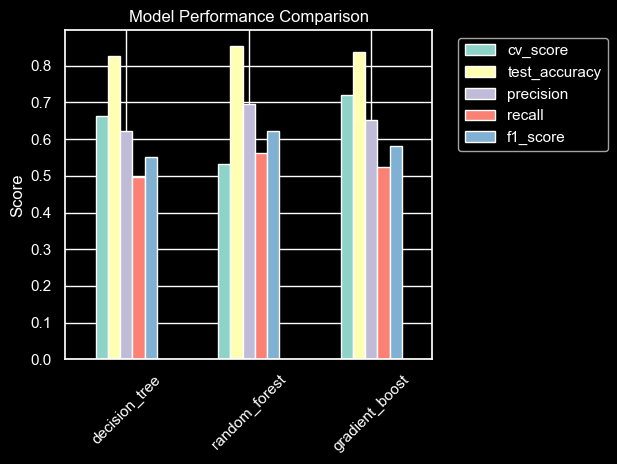


=== DECISION_TREE DETAILED RESULTS ===


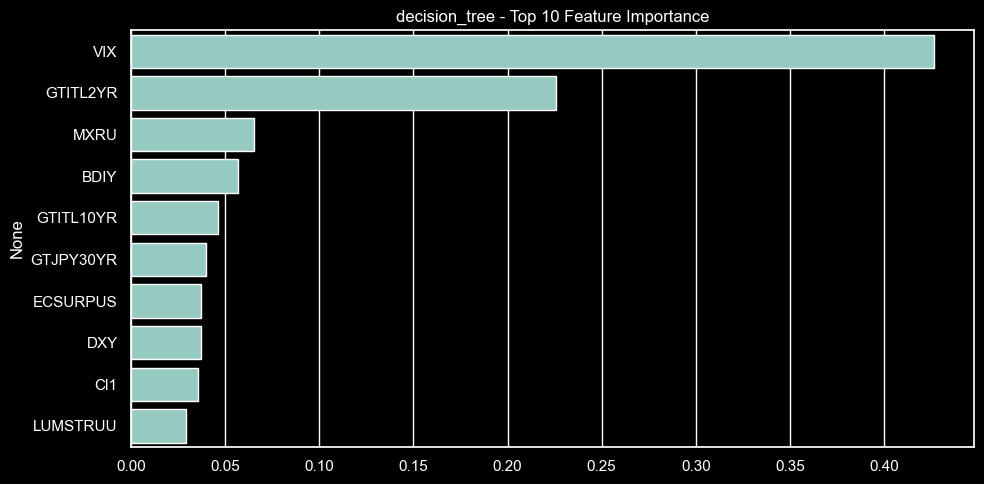


Model Performance Metrics:


Metric   Value
0              Accuracy  0.8274
1             Precision  0.6216
2                Recall  0.4964
3                    F1  0.5520
4        True Negatives     468
5       False Positives      42
6       False Negatives      70
7        True Positives      69
8           Specificity  0.9176
9   False Positive Rate  0.0824
10  False Negative Rate  0.5036

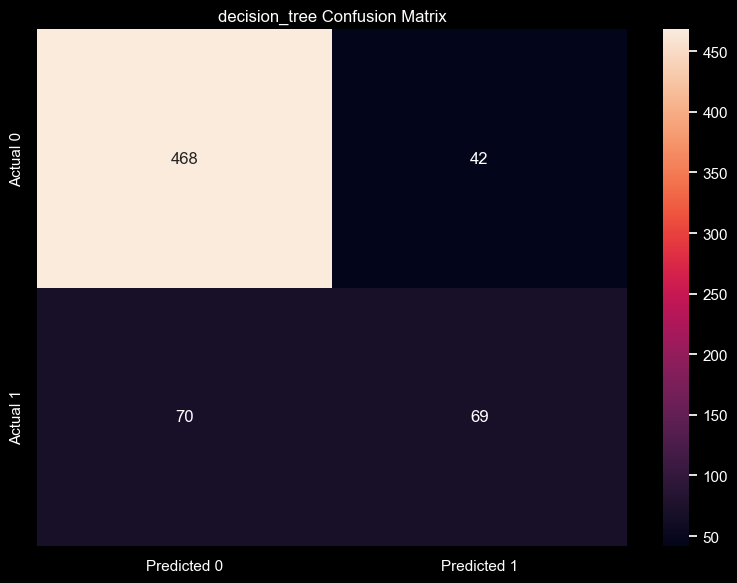

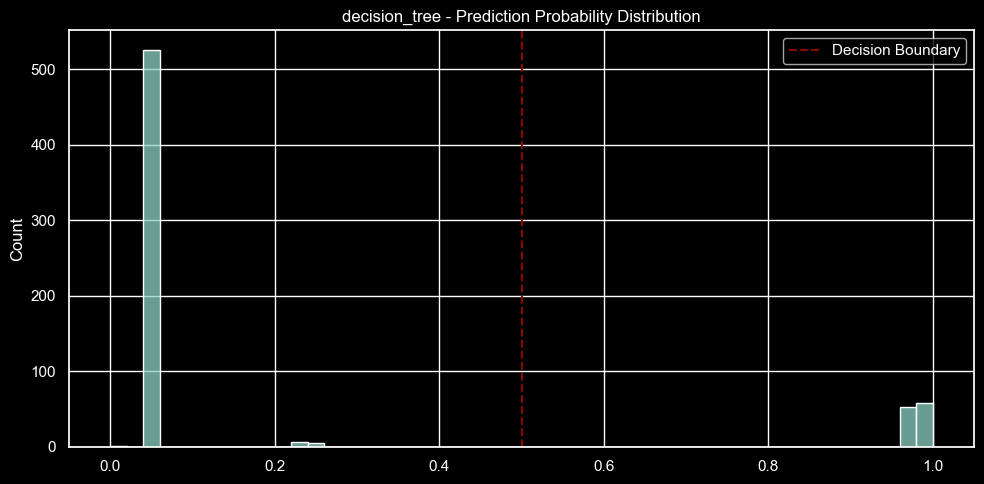


Uncertain Predictions Summary (threshold ±0.4):


Date  True_Label  Predicted_Prob
492  6/16/2009           0           0.250
605  8/16/2011           1           0.250
607  8/30/2011           1           0.250
610  9/20/2011           1           0.250
842   3/1/2016           0           0.222


=== RANDOM_FOREST DETAILED RESULTS ===


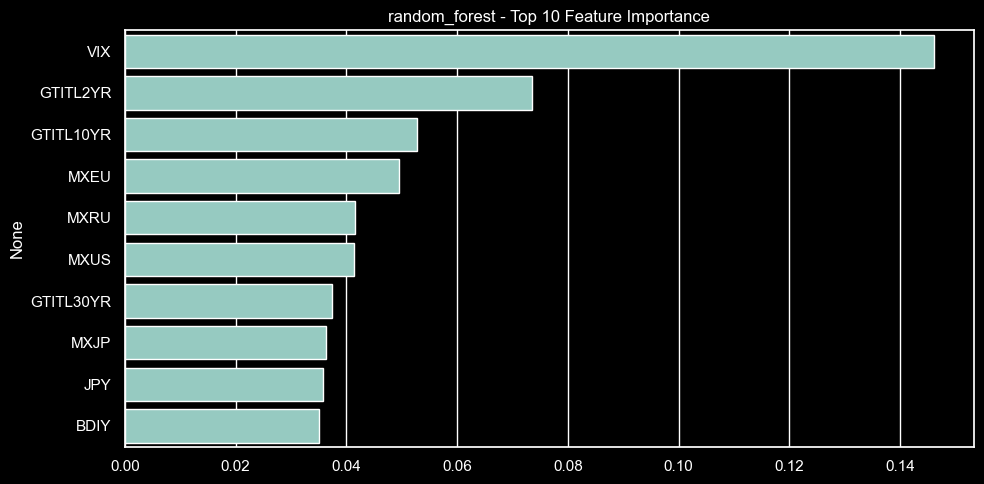


Model Performance Metrics:


Metric   Value
0              Accuracy  0.8536
1             Precision  0.6964
2                Recall  0.5612
3                    F1  0.6215
4        True Negatives     476
5       False Positives      34
6       False Negatives      61
7        True Positives      78
8           Specificity  0.9333
9   False Positive Rate  0.0667
10  False Negative Rate  0.4388

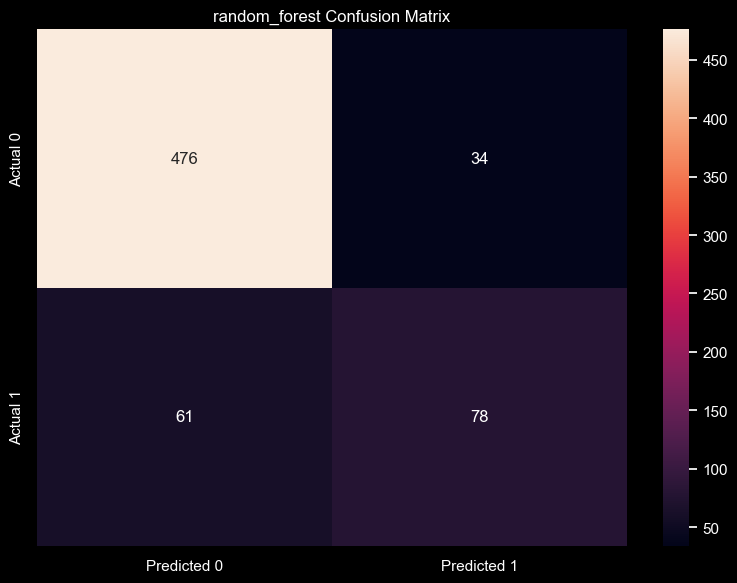

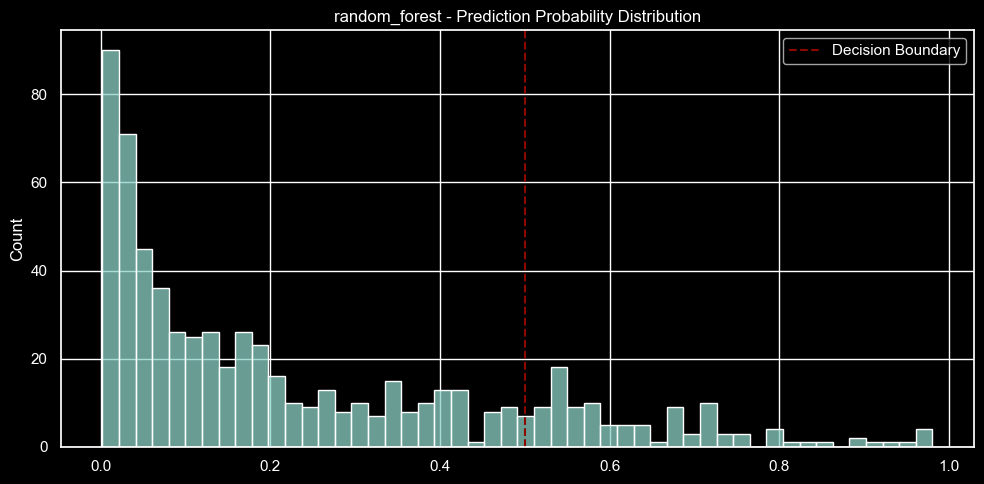


Uncertain Predictions Summary (threshold ±0.4):


Date  True_Label  Predicted_Prob
8    3/7/2000           0           0.719
9   3/14/2000           0           0.686
10  3/21/2000           0           0.537
11  3/28/2000           0           0.701
12   4/4/2000           0           0.489


=== GRADIENT_BOOST DETAILED RESULTS ===


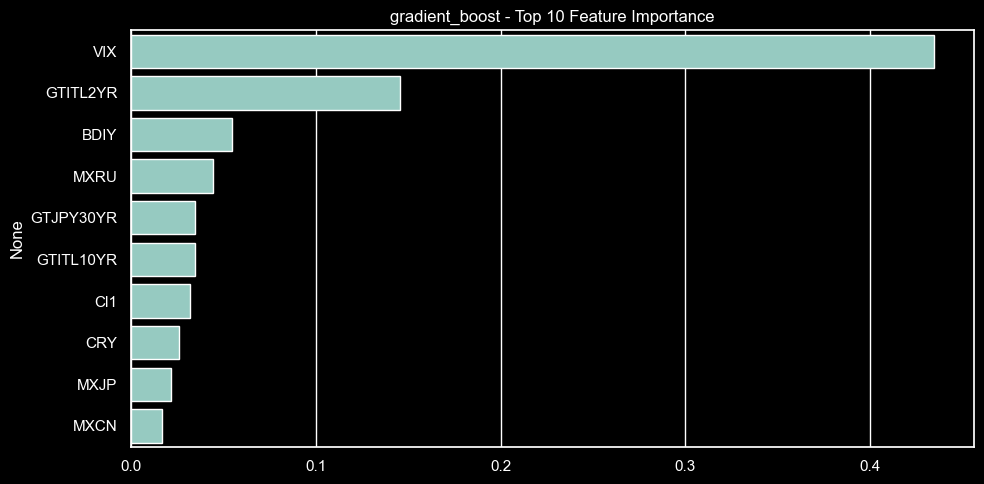


Model Performance Metrics:


Metric   Value
0              Accuracy  0.8382
1             Precision  0.6518
2                Recall  0.5252
3                    F1  0.5817
4        True Negatives     471
5       False Positives      39
6       False Negatives      66
7        True Positives      73
8           Specificity  0.9235
9   False Positive Rate  0.0765
10  False Negative Rate  0.4748

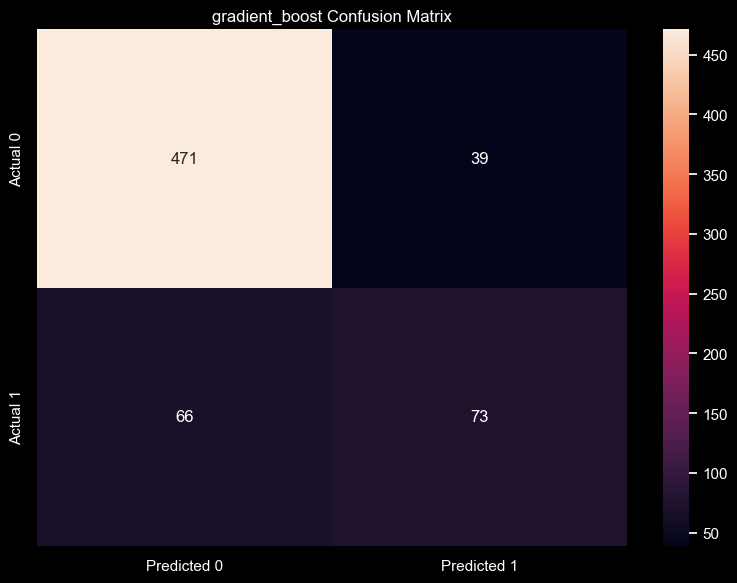

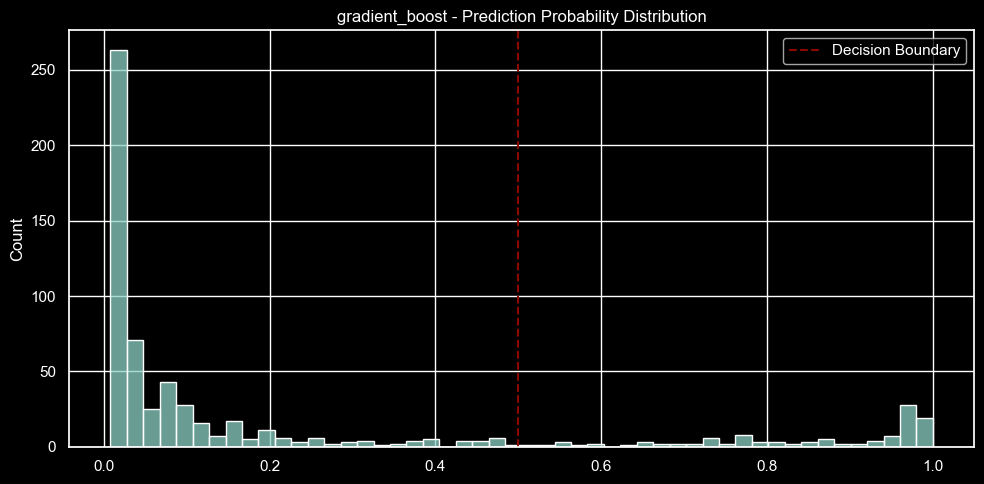


Uncertain Predictions Summary (threshold ±0.4):


Date  True_Label  Predicted_Prob
8    3/7/2000           0           0.842
9   3/14/2000           0           0.849
10  3/21/2000           0           0.233
11  3/28/2000           0           0.765
12   4/4/2000           0           0.315


=== Cross-Model Analysis ===


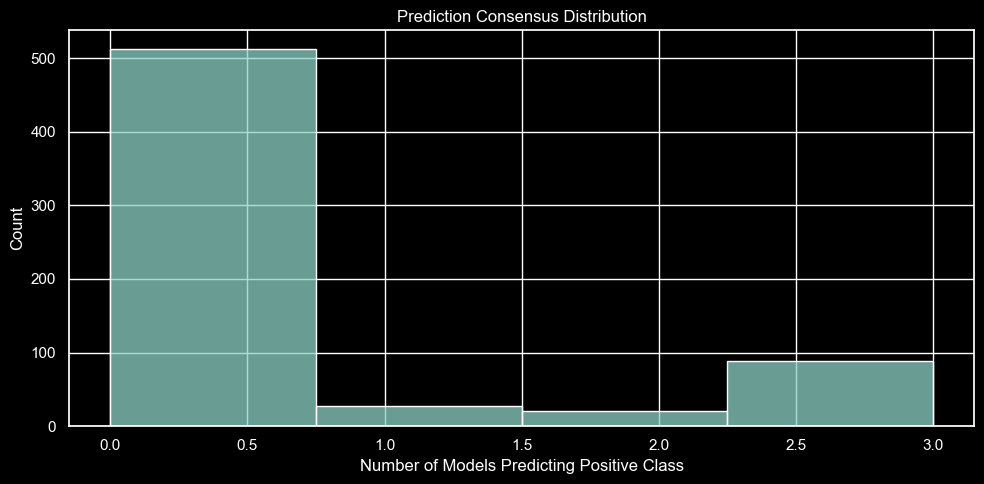


Consensus Predictions Summary:


decision_tree  random_forest  gradient_boost  prediction_votes       Data  true_label
8               1              1               1                 3   3/7/2000           0
9               1              1               1                 3  3/14/2000           0
10              1              1               0                 2  3/21/2000           0
11              1              1               1                 3  3/28/2000           0
13              1              1               0                 2  4/11/2000           0


=== Saving Results ===

=== Analysis Summary ===


Value
Total Samples                   1111
Features Analyzed                 42
Models Evaluated                   3
Consensus Predictions            109
Average Accuracy               0.840
Best Model             random_forest
Best Accuracy                  0.854


=== Analysis Complete ===


In [51]:
import importlib
import feature.feature_relevance
from feature.feature_relevance import get_relevant_features, evaluate_models
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report  # Add these imports


# Set display options for better notebook visualization
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Load the data
print("=== Loading Data ===")
df = pd.read_csv('./data/FinancialMarketData.xlsx - EWS.csv')
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}\n")

# Define parameters
target_col = 'Y'
date_col = 'Data'

# Define model parameters
model_params = {
    'decision_tree': {'max_depth': 5, 'min_samples_split': 5},
    'random_forest': {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5},
    'gradient_boost': {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3}
}

print("=== Starting Model Evaluation ===")
model_results, performance_df = evaluate_models(df, target_col=target_col)

# Create a summary notebook display
print("\n=== Model Performance Summary ===")
summary_metrics = ['cv_score', 'test_accuracy', 'precision', 'recall', 'f1_score']
display(performance_df[['model'] + summary_metrics])

# Create visualization for model comparison
plt.figure(figsize=(12, 6))
performance_metrics_plot = performance_df[summary_metrics].plot(kind='bar')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(range(len(performance_df)), performance_df['model'], rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Analyze and visualize results for each model
for model_name, results in model_results.items():
    print(f"\n=== {model_name.upper()} DETAILED RESULTS ===")
    
    # Feature importance visualization
    plt.figure(figsize=(10, 5))
    importance_df = results['importance_scores'].head(10)
    sns.barplot(x=importance_df.values, y=importance_df.index)
    plt.title(f'{model_name} - Top 10 Feature Importance')
    plt.tight_layout()
    plt.show()
    
    # Performance metrics display
    print("\nModel Performance Metrics:")
    metrics_df = pd.DataFrame({
        'Metric': results['performance_metrics'].keys(),
        'Value': [f"{v:.4f}" if isinstance(v, float) else v 
                 for v in results['performance_metrics'].values()]
    })
    display(metrics_df)
    
    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(results['y_test'], results['predictions']), 
                annot=True, 
                fmt='d',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.tight_layout()
    plt.show()
    
    # Probability Distribution
    plt.figure(figsize=(10, 5))
    sns.histplot(data=results['probabilities'], bins=50)
    plt.title(f'{model_name} - Prediction Probability Distribution')
    plt.axvline(x=0.5, color='r', linestyle='--', label='Decision Boundary')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Analyze uncertain predictions
    uncertainty_threshold = 0.4
    uncertain_mask = (results['probabilities'] > 0.5 - uncertainty_threshold) & \
                    (results['probabilities'] < 0.5 + uncertainty_threshold)
    uncertain_df = pd.DataFrame({
        'Date': df.loc[results['X_test'].index[uncertain_mask], 'Data'],
        'True_Label': results['y_test'][uncertain_mask],
        'Predicted_Prob': results['probabilities'][uncertain_mask]
    })
    
    print(f"\nUncertain Predictions Summary (threshold ±{uncertainty_threshold}):")
    display(uncertain_df.head())

# Cross-model analysis
print("\n=== Cross-Model Analysis ===")
prediction_consensus = pd.DataFrame(index=model_results['random_forest']['X_test'].index)

for model_name, results in model_results.items():
    prediction_consensus[model_name] = results['predictions']

# Compute consensus
prediction_consensus['prediction_votes'] = prediction_consensus.sum(axis=1)
prediction_consensus['Data'] = df.loc[prediction_consensus.index, 'Data']
prediction_consensus['true_label'] = model_results['random_forest']['y_test']

# Visualize consensus
plt.figure(figsize=(10, 5))
sns.histplot(data=prediction_consensus['prediction_votes'], bins=len(model_results)+1)
plt.title('Prediction Consensus Distribution')
plt.xlabel('Number of Models Predicting Positive Class')
plt.tight_layout()
plt.show()

# Display consensus predictions
consensus_threshold = len(model_results) / 2
consensus_predictions = prediction_consensus[prediction_consensus['prediction_votes'] >= consensus_threshold]
print("\nConsensus Predictions Summary:")
display(consensus_predictions.head())

# Save results
print("\n=== Saving Results ===")
performance_df.to_csv('./results/model_performance_comparison.csv')
consensus_predictions.to_csv('./results/consensus_predictions.csv')

# Final summary
print("\n=== Analysis Summary ===")
summary_dict = {
    'Total Samples': len(df),
    'Features Analyzed': len(df.columns) - 2,  # excluding target and date
    'Models Evaluated': len(model_results),
    'Consensus Predictions': len(consensus_predictions),
    'Average Accuracy': performance_df['test_accuracy'].mean(),
    'Best Model': performance_df.loc[performance_df['test_accuracy'].idxmax(), 'model'],
    'Best Accuracy': performance_df['test_accuracy'].max()
}
summary_df = pd.DataFrame.from_dict(summary_dict, orient='index', columns=['Value'])
display(summary_df)

print("\n=== Analysis Complete ===")

In [42]:
import yfinance as yf
import pandas as pd

def download_stock_data(ticker, dates):
    """
    Download stock data for specific dates
    
    Parameters:
    -----------
    ticker : str
        Stock ticker symbol
    dates : pd.DatetimeIndex
        Dates to get stock data for
        
    Returns:
    --------
    pd.Series
        Close prices for the specified dates
    """
    try:
        # Download data with some padding to ensure we get all dates
        start_date = min(dates) - pd.Timedelta(days=5)
        end_date = max(dates) + pd.Timedelta(days=5)
        
        data = yf.download(ticker, start=start_date, end=end_date)
        if data.empty:
            print(f"No data found for {ticker}. Please verify the ticker symbol.")
            return None
            
        # Reindex to match exact dates and get close prices
        close_prices = data['Close'].reindex(dates)
        return close_prices
        
    except Exception as e:
        print(f"Error downloading {ticker}: {str(e)}")
        return None

# Convert dates to datetime if they're not already
df['Data'] = pd.to_datetime(df['Data'])

# Create new DataFrame with dates and Y values
new_df = pd.DataFrame({
    'Data': df['Data'],
    'Y': df['Y']
})

# Set Data as index temporarily for easier alignment
new_df.set_index('Data', inplace=True)

# List of stock tickers to add
stock_tickers = ['MSFT', 'GOOG', 'AAPL']

# Download and add stock data
for ticker in stock_tickers:
    print(f"\nDownloading data for {ticker}...")
    close_prices = download_stock_data(ticker, new_df.index)
    if close_prices is not None:
        new_df[f'{ticker}_Close'] = close_prices

# Reset index to make Data a column again
new_df.reset_index(inplace=True)

# Display results
print("\nFirst few rows of the new dataset:")
print(new_df.head())

# Display info about missing values
print("\nMissing values in each column:")
print(new_df.isnull().sum())

# Save to CSV if needed
new_df.to_csv('./data/stock_data_with_y.csv', index=False)

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


First few rows of the new dataset:
        Data  Y  MSFT_Close  GOOG_Close  AAPL_Close
0 2000-01-11  0      33.653         NaN       0.699
1 2000-01-18  0      35.479         NaN       0.783
2 2000-01-25  0      31.633         NaN       0.845
3 2000-02-01  0      31.672         NaN       0.755
4 2000-02-08  1      33.826         NaN       0.865

Missing values in each column:
Data            0
Y               0
MSFT_Close     14
GOOG_Close    251
AAPL_Close     14
dtype: int64


[*********************100%***********************]  1 of 1 completed


Price       Close   High    Low   Open Volume
Ticker       ^VIX   ^VIX   ^VIX   ^VIX   ^VIX
Date                                         
2020-01-02 12.470 13.720 12.420 13.460      0
2020-01-03 14.020 16.200 13.130 15.010      0
2020-01-06 13.850 16.390 13.540 15.450      0
2020-01-07 13.790 14.460 13.390 13.840      0
2020-01-08 13.450 15.240 12.830 15.160      0


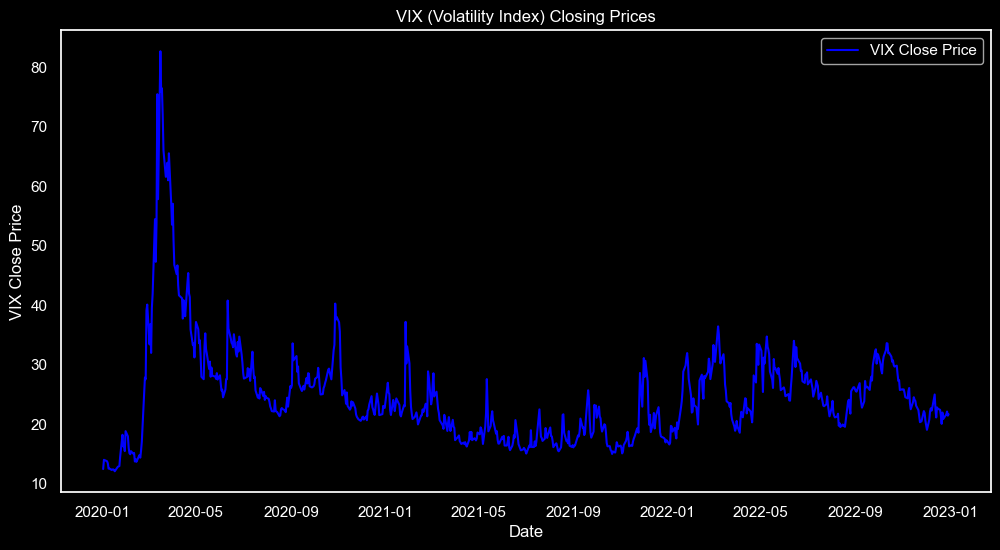


Basic Statistics:
Price    Close    High     Low    Open  Volume
Ticker    ^VIX    ^VIX    ^VIX    ^VIX    ^VIX
count  756.000 756.000 756.000 756.000 756.000
mean    24.849  26.613  23.621  25.123   0.000
std      8.759   9.765   7.804   8.830   0.000
min     12.100  12.420  11.750  12.200   0.000
25%     19.368  20.840  18.542  19.635   0.000
50%     23.135  24.700  22.255  23.490   0.000
75%     27.990  30.045  26.840  28.402   0.000
max     82.690  85.470  70.370  82.690   0.000


In [52]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the ticker symbol for VIX
vix_ticker = "^VIX"

# Fetch VIX data from Yahoo Finance
vix_data = yf.download(vix_ticker, start="2020-01-01", end="2023-01-01")

# Display the first few rows of the data
print(vix_data.head())

# Plot the VIX data
plt.figure(figsize=(12, 6))
plt.plot(vix_data['Close'], label='VIX Close Price', color='blue')
plt.title('VIX (Volatility Index) Closing Prices')
plt.xlabel('Date')
plt.ylabel('VIX Close Price')
plt.legend()
plt.grid()
plt.show()

# Basic statistics
print("\nBasic Statistics:")
print(vix_data.describe())

# Save the data to a CSV file if needed
vix_data.to_csv('vix_data.csv')

In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv('./data/FinancialMarketData.xlsx - EWS.csv')
df.set_index('Data', inplace=True)